# Исследование объявлений о продаже квартир

### Изучение общей информации о данных

In [161]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [162]:
pd.options.display.float_format = '{:,.2f}'.format

try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/Users/anshilina/Documents/real_estate_data.csv', sep='\t')

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [164]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [165]:
# df.hist(figsize=(15,20), bins=20);

**Вывод:** Всего в массиве данных 23,6 тыс. наблюдений. Во многих переменных присутсвуют выбросы. В ряде переменных пропущены значения. У некоторых переменных необходимо изменить тип данных. В разделах ниже предлагаются решения для удаления выбросов, замены пропусков и изменения типов данных.

### Предобработка данных

#### Удаление дубликатов

Поскольку при анализе переменных интересно изучить наблюдения, сгруппированные по местностям, нужно унифицировать все названия и удалить явные и не явные дубликаты.

Попробуем найти и удалить неявные дубликаты. Рассмотрим уникальные значения переменной `locality_name`.

In [166]:
# sorted(df['locality_name'].unique())

Перед тем как произвести замену, заполним пропущенные значения в переменной `locality_name`. Поскольку мы не можем востановить название метсности исходя из данных, заменим его на значение 'unknown'.

In [167]:
df.loc[df['locality_name'].isna(), 'locality_name'] =\
df.loc[df['locality_name'].isna(), 'locality_name'].fillna('unknown')

print('Кол-во пропусков в переменной "locality_name":', df['locality_name'].isna().sum())

Кол-во пропусков в переменной "locality_name": 0


Теперь унифицируем названия в столбце `locality_name` и таким образом избавимся от неявных дубликатов. Для этого будем использовать **регулярные выражения**.

In [168]:
d = {}
def sorter(series):
    name = ' '.join(re.findall('(?:[A-ЯЁ])\w+', str(series)))
    locality_type = ' '.join(re.findall(r'\b[а-яё]+\b', str(series)))
    if name not in d.keys():
        d[name] = locality_type
        return ' '.join([d[name], name]).strip()
    else:
        return ' '.join([d[name], name]).strip()

In [169]:
df['locality_name2'] = df['locality_name'].apply(sorter)

В массиве данных нет явных дубликатов.

In [170]:
df.duplicated().sum()

0

**Вывод:** Неявные дубликаты были удалены в результате изучения уникальных значений переменной `locality_name`. Повторы выявлялись вручную, а затем заменялись в срезе неверных значений. В массиве не было обнаружено явных дубликатов.

### Исследование и заполнение пропусков в данных

Для проведения исследовательского анализа необходимо заполнить пропуски в ряде переменных. Перед заполнением переменных нужно убедиться, что в данных нет выбросов (мы не хотим, чтобы они повлияли на значение, которым мы будем заменять пропуски). Поэтому в этом разделе будут реализовываться последовательно две задачи: 

* изучить распределение переменной, выявить и удалить выбросы
* заполнить пропуски, исходя из данных

In [171]:
pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


#### Переменные balcony и is_apartment

Для начала заполним пропуски в переменных `balcony` (число балконов) и `is_apartment` (принимает значение `True`, если квартира является апартаментами). Если продавец не указал число балконов, скорее всего их у него нет. По аналогии, если продавец не указал тип жилья как "апартаменты", скорее всего это не они. Заменим пропуски в этих переменных на ноль (`False`).

In [172]:
df['balcony'].fillna(0, inplace=True)
print('Кол-во пропусков в переменной "balcony":', df['balcony'].isna().sum())

df['is_apartment'].fillna(False, inplace=True)
print('Кол-во пропусков в переменной "is_apartment":', df['is_apartment'].isna().sum())

Кол-во пропусков в переменной "balcony": 0
Кол-во пропусков в переменной "is_apartment": 0


#### Переменные living_area и kitchen_area

Пропуски также присутсвуют в переменных `living_area` (жилая площадь в квадратных метрах) и `kitchen_area` (площадь кухни в квадратных метрах). Но перед тем как приступить к заполнению пропусков необходимо понять, есть ли выбросы в данных по этим переменным.

Изучим переменную `living_area`. Посмотрим на описательные статистики и гистограмму распределения значений.

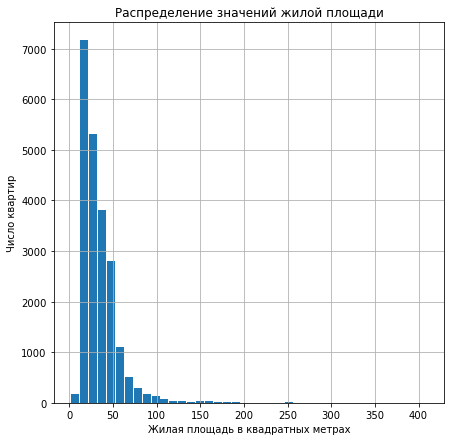

In [173]:
df['living_area'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Жилая площадь в квадратных метрах')
plt.ylabel('Число квартир')
plt.title('Распределение значений жилой площади')
plt.show()

In [174]:
df['living_area'].describe()

count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

Мы видим, что в данных присутсвуют аномально малые значения – жилые помещения менее 5 м². Появилось предположение, что это студии, где площадь жилой команты включена в площадь кухни, т.е. общая площадь будет адекватной. Но анализ показал, что среди этих помещений только одна студия, а выбросов – 4. Выбросы будет лучше исключить из выборки.

In [175]:
small_living_area = (df
                     .query('living_area < 5')
                     .pivot_table(index='locality_name', values=['studio', 'last_price', 'total_area'], 
                                  aggfunc={'studio':['mean'], 'last_price':'median', 'total_area':'median'})
)

small_living_area.columns = ['median_price', 'is_studio', 'median_total_area']
display(small_living_area)

,median_price,is_studio,median_total_area
locality_name,,,
Санкт-Петербург,"6,350,000.00",0.00,52.00
посёлок Мурино,"2,330,000.00",1.00,23.00


Из описательных статистик и диаграммы разброса по значениям переменной `living_area` видно, что в данных также присутсвуют экстремально большие значения.

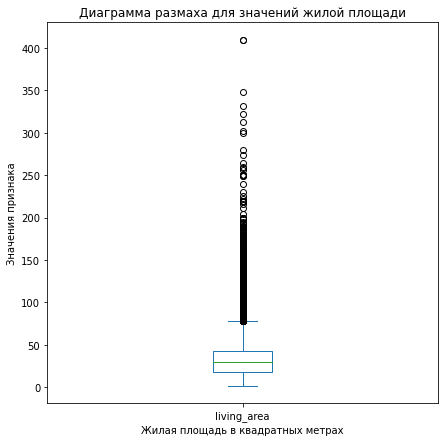

In [176]:
df.plot(y='living_area', kind='box', figsize=(7,7))

plt.xlabel('Жилая площадь в квадратных метрах')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для значений жилой площади')
plt.show()

In [177]:
big_living_area = (df
                     .query('living_area > 77')
                     .pivot_table(index='locality_name', values=['last_price', 'total_area'], 
                                  aggfunc={'last_price':['median', 'count'], 'total_area':'median'})
)

big_living_area.columns = ['count', 'median_price', 'median_total_area']
display(big_living_area.sort_values(by='median_total_area', ascending=False).head())

,count,median_price,median_total_area
locality_name,,,
Красное Село,1,"14,000,000.00",320.00
Колпино,2,"22,450,000.00",237.25
Сертолово,1,"13,200,000.00",236.00
посёлок Стрельна,3,"15,500,000.00",204.00
деревня Бор,1,"20,295,200.00",192.30


Подозрительным в данных является всё: и огромный размер жилой площади, и сравнительно небольшая строимость квартиры (или участка). Поскольку природа этих выбросов не ясна, частично удалим их.

Поскольку были выявлены экстремально малые и большие значения, предлагается удалить их, но частично: оставить 99% имеющихся данных.

In [178]:
quantile005 = df['living_area'].quantile(0.005)
quantile995 = df['living_area'].quantile(0.995)

In [179]:
df = df.query('@quantile005 < living_area < @quantile995').copy()

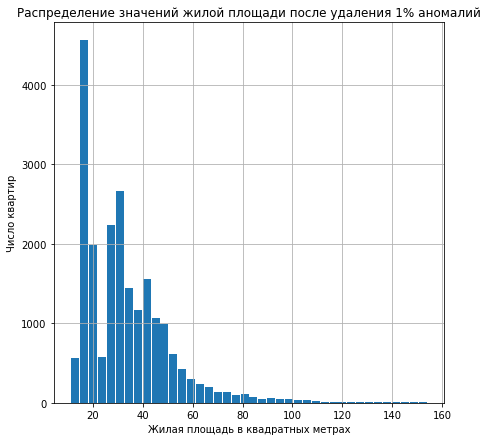

In [180]:
df['living_area'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Жилая площадь в квадратных метрах')
plt.ylabel('Число квартир')
plt.title('Распределение значений жилой площади после удаления 1% аномалий')
plt.show()

In [181]:
df['living_area'].describe()

count   21,578.00
mean        33.75
std         18.31
min         11.20
25%         18.70
50%         30.00
75%         42.10
max        154.00
Name: living_area, dtype: float64

Теперь гистограмма и описательные статистики приближены к реальному распределению данных. После удаления выбросов среднее и медиана (и др. описательные статистики) не сильно изменились.

In [182]:
print('Кол-во пропусков в переменной "living_area":', df['living_area'].isna().sum())

Кол-во пропусков в переменной "living_area": 0


Далее изучим переменную `kitchen_area`. Посмотрим на распределение переменной `kitchen_area`, описательные статистики и возможные выбросы.

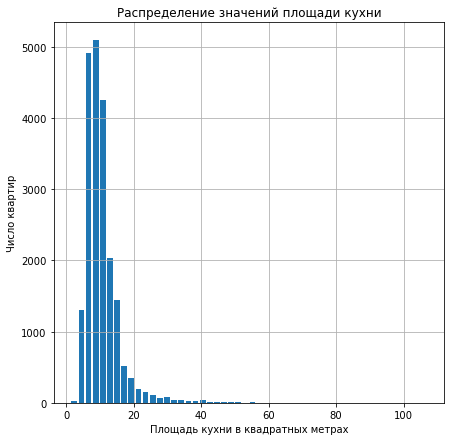

In [183]:
df['kitchen_area'].hist(bins=50, figsize=(7,7), rwidth=0.8)

plt.xlabel('Площадь кухни в квадратных метрах')
plt.ylabel('Число квартир')
plt.title('Распределение значений площади кухни')
plt.show()

In [184]:
df['kitchen_area'].describe()

count   20,801.00
mean        10.40
std          5.55
min          1.30
25%          7.00
50%          9.00
75%         11.90
max        107.00
Name: kitchen_area, dtype: float64

Из гистограммы видно, что в массиве данных есть выбивающиеся экстремально маленькие значения (кухни меньше 5 м²). Изучим их.

In [185]:
small_kitchen = (df
                 .query('kitchen_area < 5')
                 .pivot_table(index='locality_name', values=['last_price', 'total_area', 'studio'], 
                              aggfunc={'studio':'mean', 'last_price':['median', 'count'], 'total_area':'median'})
)

small_kitchen.columns = ['count', 'median_price', 'is_studio', 'median_total_area']
display(small_kitchen.sort_values(by='median_price', ascending=False).head())

,count,median_price,is_studio,median_total_area
locality_name,,,,
Зеленогорск,1,"3,700,000.00",0.00,40.80
Пушкин,3,"3,500,000.00",0.00,43.00
посёлок Стрельна,3,"3,400,000.00",0.00,43.90
Санкт-Петербург,48,"3,325,000.00",0.00,28.40
Кронштадт,3,"3,300,000.00",0.00,41.40


Мы видим, что все эти квартиры не являются студиями, поэтому нельзя сделать вывод, что метраж кухни был включен в данные. Эти данные выглядят как выбросы. Предлагается убрать их из выборки.

In [186]:
small_kitchen['is_studio'].all()

False

Далее рассмотрим экстремально большие значения. Из диаграмы размаха мы видим, что выбросами считаются все значения больше 19 м².

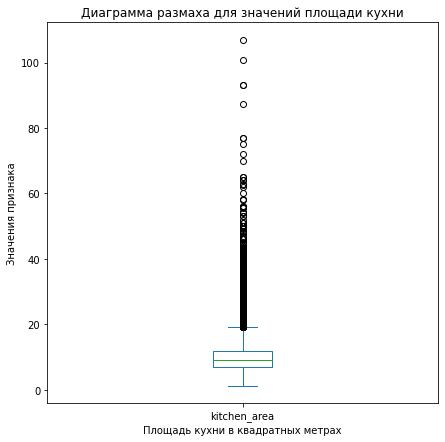

In [187]:
df.plot(y='kitchen_area', kind='box', figsize=(7,7))

plt.xlabel('Площадь кухни в квадратных метрах')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для значений площади кухни')
plt.show()

In [188]:
big_kitchen = (df
                 .query('kitchen_area > 19')
                 .pivot_table(index='locality_name', values=['last_price', 'total_area', 'kitchen_area'], 
                              aggfunc={'last_price':['median', 'count'], 'total_area':'median', 'kitchen_area':'median'})
)

big_kitchen.columns = ['median_kitchen_area', 'count', 'median_price', 'median_total_area']
display(big_kitchen.sort_values(by='median_price', ascending=False).head())

,median_kitchen_area,count,median_price,median_total_area
locality_name,,,,
посёлок Репино,30.00,1,"28,000,000.00",160.00
посёлок Стрельна,35.00,1,"17,800,000.00",204.00
Зеленогорск,23.90,3,"17,212,500.00",76.50
Санкт-Петербург,24.40,941,"14,380,000.00",107.60
Пушкин,26.25,26,"12,995,000.00",103.95


Поскольку природа этих выбросов не ясна, удалим их и посмотрим на получившееся распределение. Как и на предыдущем шаге предлагается оставить 99% данных в массиве, чтобы сохранить его изначальное распределение и не фокусироваться только на стандартных величинах.

In [189]:
quantile005 = df['kitchen_area'].quantile(0.005)
quantile995 = df['kitchen_area'].quantile(0.995)

In [190]:
df = df.query('@quantile005 < kitchen_area < @quantile995').copy()

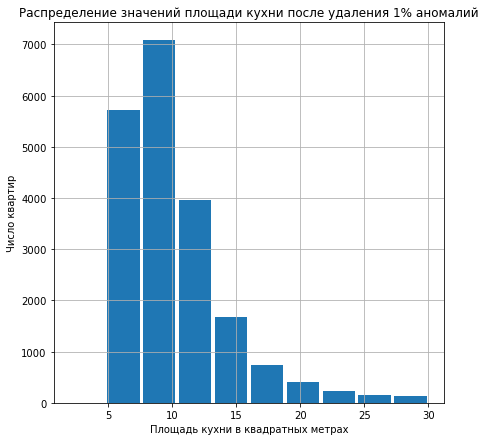

In [191]:
df['kitchen_area'].hist(range=(2,30), figsize=(7,7), rwidth=0.9)

plt.xlabel('Площадь кухни в квадратных метрах')
plt.ylabel('Число квартир')
plt.title('Распределение значений площади кухни после удаления 1% аномалий')
plt.show()

In [192]:
df['kitchen_area'].describe()

count   20,227.00
mean        10.30
std          4.56
min          5.04
25%          7.10
50%          9.10
75%         11.95
max         39.90
Name: kitchen_area, dtype: float64

In [193]:
print('Количество пропусков в переменной "kitchen_area":', df['kitchen_area'].isna().sum())

Количество пропусков в переменной "kitchen_area": 0


#### Переменная floors_total

Теперь изучим переменную `floors_total` и заполним пропуски. После проверки данных на наличие закономерностей было определено, что все квартиры без указания кол-ва этажей – это не аппартаменты. Но учитывая, что после замены пропусков в переменной `is_apartment` этого типа жилья в выборке стало больше, мы не можем назвать это закономерностью в данных. Скорее всего это совпадение.

In [194]:
# проверяем, нет ли закономерности в пропусках переменной 'floors_total'
none_floors_total = df[df['floors_total'].isna() == True]

# все квартиры без указания кол-ва этажей – это не аппартаменты
print(none_floors_total['is_apartment'].unique())

[False]


Оценим распредение переменной `floors_total` и описательные статистики до заполнения пропусков.

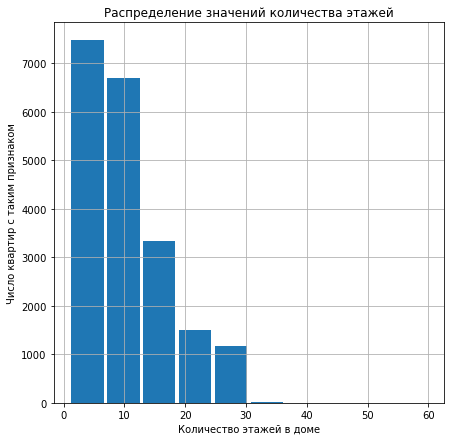

In [195]:
df['floors_total'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Количество этажей в доме')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений количества этажей')
plt.show()

In [196]:
df['floors_total'].describe()

count   20,190.00
mean        10.67
std          6.52
min          1.00
25%          5.00
50%          9.00
75%         15.00
max         60.00
Name: floors_total, dtype: float64

Оценим и изучим возможные выбросы.

In [197]:
print('Всего выбросов:', df[df['floors_total'] > 30].shape[0])

Всего выбросов: 28


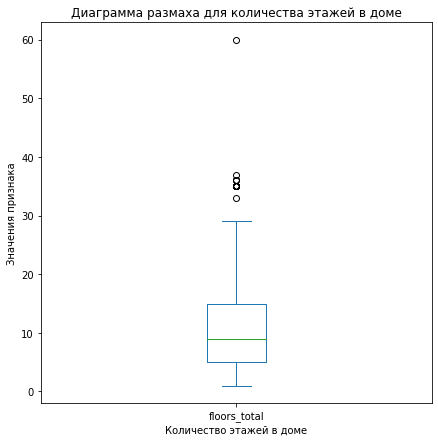

In [198]:
df['floors_total'].plot(kind='box', figsize=(7,7))

plt.xlabel('Количество этажей в доме')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для количества этажей в доме')
plt.show()

In [199]:
high_floors = (df
               .query('floors_total > 30')
               .pivot_table(index='locality_name', values='floors_total', aggfunc=['mean', 'count'])
)

high_floors.columns = ['mean_floors', 'count']

print(high_floors)

                 mean_floors  count
locality_name                      
Кронштадт              60.00      1
Санкт-Петербург        35.11     27


Данные выглядят неправдоподобно – слишком высокие здания для этих городов. Поскольку в данных есть выбросы (всего их немного, 26 наблюдений), было принято решение их удалить, а пропуски заменить медианным значением.

In [200]:
df = df.query('floors_total < 30').copy()

In [201]:
print('Кол-во пропусков в переменной "floors_total":', df['floors_total'].isna().sum())

Кол-во пропусков в переменной "floors_total": 0


#### Переменная ceiling_height

Далее рассмотрим переменную `ceiling_height`. Перед тем как перейти к замене пропусков в переменной `ceiling_height` (высота потолков), необходимо избавится от аномальных значений в данных. 

Заменим аномальные значения. Потолки больше 10 м трудно представить. Скорее всего это опечатка в данных. Используем это значение 10 м в качестве порога, чтобы избавиться от аномальных значений.

In [202]:
def ceiling_corrector(series):
    if series > 10:
        return series * 0.1
    else:
        return series

df['ceiling_height'] = df['ceiling_height'].apply(ceiling_corrector)

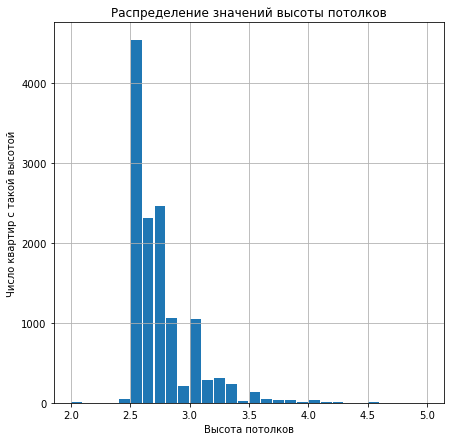

In [203]:
df.hist('ceiling_height', bins = 30, range=(2,5), figsize=(7,7), rwidth=0.9)

plt.xlabel('Высота потолков')
plt.ylabel('Число квартир с такой высотой')
plt.title('Распределение значений высоты потолков')
plt.show()

In [204]:
df['ceiling_height'].describe()

count   12,849.00
mean         2.72
std          0.29
min          1.00
25%          2.52
50%          2.65
75%          2.80
max         10.00
Name: ceiling_height, dtype: float64

Гистограмма отражает реальное распределение данных. Теперь мы можем заменить пропущенные значения.

In [205]:
# проверяем, нет ли закономерности в пропусках

# none_ceiling_height = df[df['ceiling_height'].isna() == True]
# for cols in none_ceiling_height.columns:
    # print(none_ceiling_height[cols].unique())
    # print()

# закономерности вявлены не были

Добившись правдоподобных значений переменной `ceiling_height`, мы можем заполнить пропуски медианными значениями (исключим влияние выбросов). 

Предлагается заменить пропуски в зависимости от того, к какому типу относится жилая площадь: обычная квартира, студия или аппартаменты, поскольку предположительно от типа жилья зависит высота потолков.

In [206]:
df['ceiling_height'] = \
df['ceiling_height'].fillna(df.groupby(['studio', 'is_apartment'])['ceiling_height'].transform('median'))

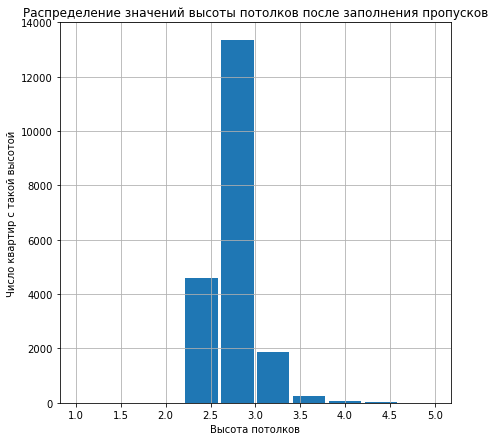

In [207]:
df.hist('ceiling_height', range=(1,5), figsize=(7,7), rwidth=0.9)

plt.xlabel('Высота потолков')
plt.ylabel('Число квартир с такой высотой')
plt.title('Распределение значений высоты потолков после заполнения пропусков')
plt.show()

In [208]:
df['ceiling_height'].describe()

count   20,162.00
mean         2.70
std          0.23
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64

In [209]:
print('Кол-во пропусков в переменной "ceiling_height":', df['ceiling_height'].isna().sum())

Кол-во пропусков в переменной "ceiling_height": 0


В целом как распределение, так и описательные статистики не изменились. Можно считать, что замена прошла успешно.

#### Категоризация данных

Предположительно пропуски в переменных `airports_nearest` (расстояние до ближайшего аэропорта в метрах), `cityCenters_nearest` (расстояние до центра города), `parks_around3000` (число парков в радиусе 3 км) и `parks_nearest` (расстояние до ближайшего парка), `parks_nearest` (число водоёмов в радиусе 3 км) и  `ponds_nearest` (расстояние до ближайшего водоёма) зависят от типа местности: город, село, деревня и проч. Вряд ли жители села или деревни смогут определить центр своего населенного пункта и вряд ли в паре км оттуда будет аэропорт. В то же время ожидается, что в деревнях и сёлах будет большая доступность парков и прудов. Необходимо проверить это предположение, и для это нам нужно категоризировать данные по типу местности.

In [210]:
def local(series):
    if 'городск' in series:
        return 'посёлок городского типа'
    elif ('поселок' in series) or ('посёлок' in series):
        return 'посёлок'
    elif 'село' in series:
        return 'село'
    elif 'товарищество' in series:
        return 'садовое товарищество'
    elif 'деревня' in series:
        return 'деревня'
    elif 'unknown' in series:
        return 'unknown'
    else:
        return 'город'
    
df['locality_type'] = df['locality_name'].apply(local)

Теперь мы сможем использовать эти категории в анализе данных и, если потребудется, заменять пропуски на основе данных из каждой категории. 

In [211]:
df['locality_type'].value_counts()

город                      17132
посёлок                     1729
деревня                      778
посёлок городского типа      456
unknown                       37
село                          25
садовое товарищество           5
Name: locality_type, dtype: int64

#### Переменные airports_nearest, cityCenters_nearest

Изучим подробнее переменную `airports_nearest`.

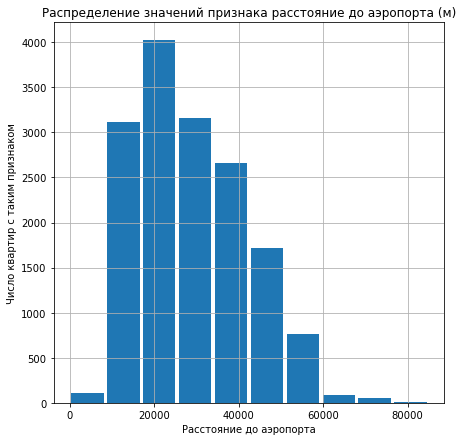

In [212]:
df['airports_nearest'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений признака расстояние до аэропорта (м)')
plt.show()

In [213]:
df['airports_nearest'].describe()

count   15,679.00
mean    28,838.37
std     12,637.33
min          0.00
25%     18,509.50
50%     26,815.00
75%     37,291.00
max     84,869.00
Name: airports_nearest, dtype: float64

Единственный выброс, который можно заметить из гистограммы – это 0 м до аэропорта. Такое возможно, только если человек живёт в аэропорту. Вряд ли кто-то продает такую квартиру.

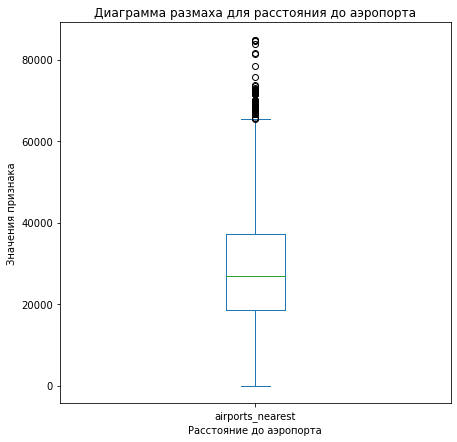

In [214]:
df['airports_nearest'].plot(kind='box', figsize=(7,7))

plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для расстояния до аэропорта')
plt.show()

Диаграмма разброса показывает, что в данных есть выбросы. Тем не менее ничего удивительного в самих данных не наблюдается. Изучим данные из сводной таблицы. Действительно, от Зеленогорска до Пулково примерно 73 км.

In [215]:
airport = (df
              .query('airports_nearest > 60000')
              .pivot_table(index='locality_name', values='airports_nearest')
)

display(airport.sort_values(by='airports_nearest', ascending=False))

,airports_nearest
locality_name,
посёлок Молодёжное,"84,536.25"
Зеленогорск,"73,342.32"
Кронштадт,"67,371.83"
посёлок Репино,"61,797.50"
посёлок Парголово,"61,630.54"
Сестрорецк,"61,177.42"


Но если даже мы попытаемся удалить 1% от этих выбросов, мы потеряем около 5 тыс. наблюдений, в том числе полностью потеряем наблюдения по деревням, сёлам, садовым товариществам и прочим группам. Предлагается оставить выбросы в выборке, чтобы не потерять группы важных наблюдений, а пропущенные значения заменить медианой, чтобы сократить влияние выбросов.

In [216]:
print('Кол-во наблюдений на данный момент:', df.shape[0])

Кол-во наблюдений на данный момент: 20162


In [217]:
quantile99 = df['airports_nearest'].quantile(0.99)
print('Сколько наблюдений останется, если мы удалим 1% выбросов:', \
      df.query('0 < airports_nearest < @quantile99').shape[0])

Сколько наблюдений останется, если мы удалим 1% выбросов: 15521


Можно убедиться, что деревень не останется, если удалим 1% выбросов, раскомментировав код.

In [218]:
# df.query('0 < airports_nearest < @quantile99')[df['locality_type'] == 'деревня']

Мы не сможем заменить пропуски в переменной `airports_nearest` для таких типов местности как деревня, посёлок городского типа, село и садовое товарищество, поскольку в каждой из групп нет ни одного значения. Эти пропуски останутся в массиве данных. Мы также сохраняем пропуски для значения *unknown*, поскольку в эту категорию могли попасть как города, так и сёла, и товарищества, и проч.

In [219]:
df['locality_type'].value_counts()

город                      17132
посёлок                     1729
деревня                      778
посёлок городского типа      456
unknown                       37
село                          25
садовое товарищество           5
Name: locality_type, dtype: int64

In [220]:
print('Кол-во пропусков для "деревень":', df.loc[df['locality_type'] == 'деревня', 'airports_nearest'].isna().sum())

print('Кол-во пропусков для "посёлков городского типа":', \
      df.loc[df['locality_type'] == 'посёлок городского типа', 'airports_nearest'].isna().sum())

print('Кол-во пропусков для "сёл":', df.loc[df['locality_type'] == 'село', 'airports_nearest'].isna().sum())

print('Кол-во пропусков для "садовых товариществ":', \
      df.loc[df['locality_type'] == 'садовое товарищество', 'airports_nearest'].isna().sum())

Кол-во пропусков для "деревень": 778
Кол-во пропусков для "посёлков городского типа": 456
Кол-во пропусков для "сёл": 25
Кол-во пропусков для "садовых товариществ": 5


Но мы можем заменить пропуски для городов и посёлков. Используем медианное значение в каждой группе.

In [221]:
print('Кол-во пропусков для "городов":', \
      df.loc[df['locality_type'] == 'город', 'airports_nearest'].isna().sum())

print('Кол-во пропусков для "посёлков":', \
      df.loc[df['locality_type'] == 'посёлок', 'airports_nearest'].isna().sum())

Кол-во пропусков для "городов": 2278
Кол-во пропусков для "посёлков": 935


In [288]:
df_test = df.copy()

city_median = df_test.loc[df_test['locality_type'].isin(['город']), 'airports_nearest'].median()

df_test.loc[df_test['locality_type'].isin(['город']), 'airports_nearest'] = \
df_test.loc[df_test['locality_type'].isin(['город']), 'airports_nearest'].fillna(city_median)

In [289]:
village_median = df_test.loc[df_test['locality_type'].isin(['посёлок']), 'airports_nearest'].median()

df_test.loc[df_test['locality_type'].isin(['посёлок']), 'airports_nearest'] = \
df_test.loc[df_test['locality_type'].isin(['посёлок']), 'airports_nearest'].fillna(village_median)

In [290]:
df_test['airports_nearest'].describe()

count   18,892.00
mean    28,439.16
std     11,549.97
min          0.00
25%     20,092.75
50%     26,942.00
75%     35,554.25
max     84,869.00
Name: airports_nearest, dtype: float64

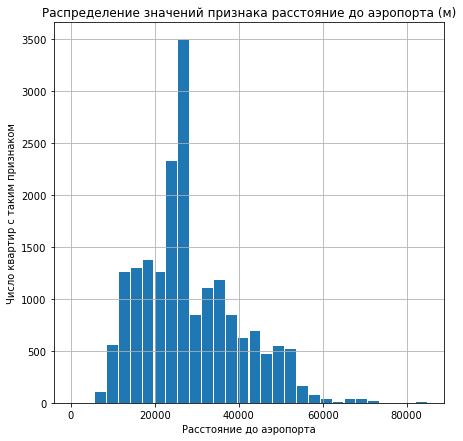

In [291]:
df_test['airports_nearest'].hist(figsize=(7,7), rwidth=0.9, bins=30)

plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений признака расстояние до аэропорта (м)')
plt.show()

Заменив все возможные пропуски мы получили следующее распределение. Из-за того,что большинство значений были заменены на медиану, мы видим что она выделяется на общем фоне. Вмешательством в массив данных мы исказили распределение. Предлагается не заменять пропуски, не удалять их и оставить в массиве.

Далее изучим переменную `cityCenters_nearest`. На гистограмме и диаграмме разброса видно, что выбросы есть как в левой, так и в правой части распределения.

In [226]:
df['cityCenters_nearest'].describe()

count   15,697.00
mean    14,202.07
std      8,516.83
min        181.00
25%      9,439.00
50%     13,123.00
75%     16,209.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

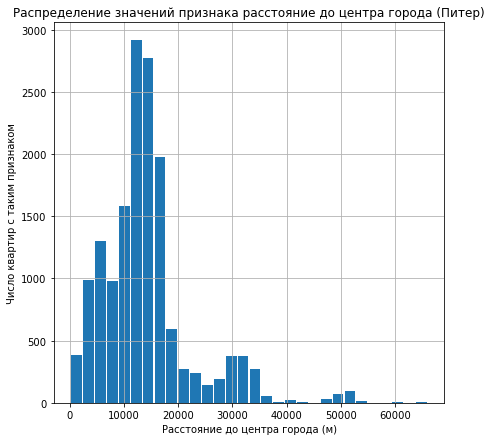

In [227]:
df['cityCenters_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений признака расстояние до центра города (Питер)')
plt.show()

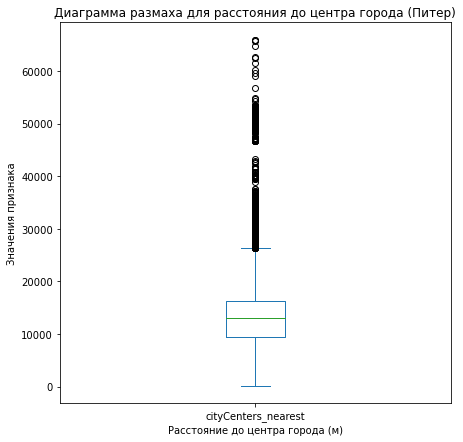

In [228]:
df['cityCenters_nearest'].plot(kind='box', figsize=(7,7))

plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для расстояния до центра города (Питер)')
plt.show()

Если мы избавимся хотя бы от 1% выбросов, то потеряем около 5 тыс. наблюдений (в т.ч. наблюдения для деревень и проч.). Предлагается отставить выбросы в выборке.

In [229]:
print('Сколько наблюдений в массиве на данный момент:', df.shape[0])

Сколько наблюдений в массиве на данный момент: 20162


In [230]:
quantile99 = df['cityCenters_nearest'].quantile(0.99)
print('Сколько наблюдений останется после удаления 1% выбросов:', df.query('cityCenters_nearest < @quantile99').shape[0])

Сколько наблюдений останется после удаления 1% выбросов: 15540


Если мы заменим пропуски в переменной `cityCenters_nearest` медианным значением, мы исказим выборку. Проиллюстрируем это.

Заменим пропуски в переменной `cityCenters_nearest`. В каждой из групп (деревня, посёлок городского типа, село и садовое товарищество) нет значения ни для одного населённого пункта. Оставляем эти пропуски в массиве.

In [231]:
print('Кол-во пропусков для "деревень":', df.loc[df['locality_type'] == 'деревня', 'cityCenters_nearest'].isna().sum())

print('Кол-во пропусков для "посёлков городского типа":', \
      df.loc[df['locality_type'] == 'посёлок городского типа', 'cityCenters_nearest'].isna().sum())

print('Кол-во пропусков для "сёл":', df.loc[df['locality_type'] == 'село', 'cityCenters_nearest'].isna().sum())

print('Кол-во пропусков для "садовых товариществ":', \
      df.loc[df['locality_type'] == 'садовое товарищество', 'cityCenters_nearest'].isna().sum())

Кол-во пропусков для "деревень": 778
Кол-во пропусков для "посёлков городского типа": 456
Кол-во пропусков для "сёл": 25
Кол-во пропусков для "садовых товариществ": 5


Пропуски в переменной `cityCenters_nearest` для городов и посёлков мы заменяем медианным значением в группе, чтобы минимизировать влияние возможных выбросов.

In [232]:
print('Кол-во пропусков для "посёлков":', df.loc[df['locality_type'] == 'посёлок', 'cityCenters_nearest'].isna().sum())

print('Кол-во пропусков для "городов":', \
      df.loc[df['locality_type'] == 'город', 'cityCenters_nearest'].isna().sum())

Кол-во пропусков для "посёлков": 935
Кол-во пропусков для "городов": 2260


In [292]:
df_test2 = df.copy()

city_median = df_test2.loc[df_test2['locality_type'].isin(['город']), 'cityCenters_nearest'].median()

df_test2.loc[df_test2['locality_type'].isin(['город']), 'cityCenters_nearest'] = \
df_test2.loc[df_test2['locality_type'].isin(['город']), 'cityCenters_nearest'].fillna(city_median)

In [293]:
village_median = df_test2.loc[df_test2['locality_type'].isin(['посёлок']), 'cityCenters_nearest'].median()

df_test2.loc[df_test2['locality_type'].isin(['посёлок']), 'cityCenters_nearest'] = \
df_test2.loc[df_test2['locality_type'].isin(['посёлок']), 'cityCenters_nearest'].fillna(village_median)

In [294]:
df_test2['cityCenters_nearest'].describe()

count   17,957.00
mean    14,027.18
std      7,976.16
min        181.00
25%     10,364.00
50%     12,812.50
75%     15,753.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

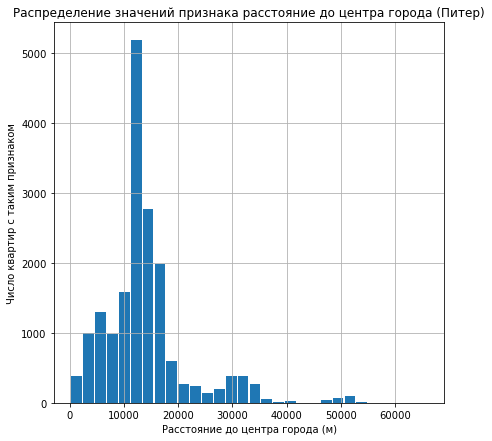

In [295]:
df_test2['cityCenters_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений признака расстояние до центра города (Питер)')
plt.show()

Из-за того,что большинство значений были заменены на медиану, мы видим что она выделяется на общем фоне. Вмешательством в массив данных мы исказили распределение. Предлагается не заменять пропуски, не удалять их и оставить в массиве.

#### Переменные parks_nearest, parks_around3000

На гистограмме видно, что выбросы для переменной `parks_around3000` не наблюдаются. 

In [237]:
df['parks_around3000'].describe()

count   15,698.00
mean         0.61
std          0.79
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around3000, dtype: float64

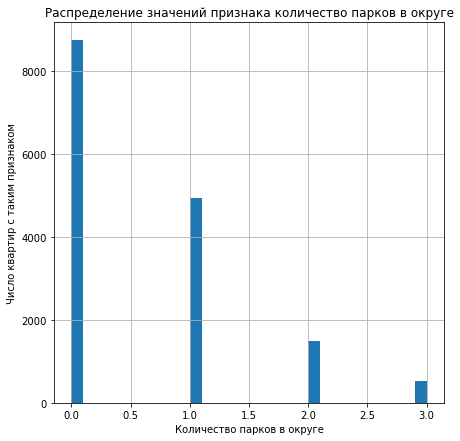

In [238]:
df['parks_around3000'].hist(bins=30, figsize=(7,7))

plt.xlabel('Количество парков в округе')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений признака количество парков в округе')
plt.show()

В каждой из групп (деревня, посёлок городского типа, село и садовое товарищество) нет значения ни для одного населённого пункта. Оставляем эти пропуски в массиве.

In [239]:
print('Кол-во пропусков для "деревень":', df.loc[df['locality_type'] == 'деревня', 'parks_around3000'].isna().sum())

print('Кол-во пропусков для "посёлков городского типа":', \
      df.loc[df['locality_type'] == 'посёлок городского типа', 'parks_around3000'].isna().sum())

print('Кол-во пропусков для "сёл":', df.loc[df['locality_type'] == 'село', 'parks_around3000'].isna().sum())

print('Кол-во пропусков для "садовых товариществ":', \
      df.loc[df['locality_type'] == 'садовое товарищество', 'parks_around3000'].isna().sum())

Кол-во пропусков для "деревень": 778
Кол-во пропусков для "посёлков городского типа": 456
Кол-во пропусков для "сёл": 25
Кол-во пропусков для "садовых товариществ": 5


Пропуски в переменной `parks_around3000` для городов и посёлков мы заменяем медианным значением в группе.

In [240]:
print('Кол-во пропусков для "городов":', df.loc[df['locality_type'] == 'город', 'parks_around3000'].isna().sum())

print('Кол-во пропусков для "посёлков":', \
      df.loc[df['locality_type'] == 'посёлок', 'parks_around3000'].isna().sum())

Кол-во пропусков для "городов": 2259
Кол-во пропусков для "посёлков": 935


In [241]:
city_median = df.loc[df['locality_type'].isin(['город']), 'parks_around3000'].median()

df.loc[df['locality_type'].isin(['город']), 'parks_around3000'] = \
df.loc[df['locality_type'].isin(['город']), 'parks_around3000'].fillna(city_median)

In [242]:
village_median = df.loc[df['locality_type'].isin(['посёлок']), 'parks_around3000'].median()

df.loc[df['locality_type'].isin(['посёлок']), 'parks_around3000'] = \
df.loc[df['locality_type'].isin(['посёлок']), 'parks_around3000'].fillna(village_median)

In [243]:
df['parks_around3000'].describe()

count   18,892.00
mean         0.50
std          0.76
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around3000, dtype: float64

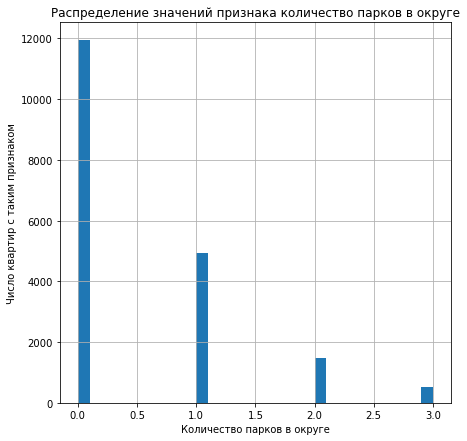

In [244]:
df['parks_around3000'].hist(bins=30, figsize=(7,7))

plt.xlabel('Количество парков в округе')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений признака количество парков в округе')
plt.show()

Перейдем к изучению переменной `parks_nearest`, в которой около 13,2 тыс. пропусков. Скорее всего дело в том, что у этих наблюдений (деревень, сёл, садовых товариществ) нет парков в ближайшей доступности, поэтому данные не могли быть выгружены. Просто удалить эти выбросы из массива нельзя: мы потеряем 13,2 тыс. наблюдений и полностью исключим некоторые категории местности.

In [245]:
print('Кол-во пропуском в переменной "parks_nearest":', df['parks_nearest'].isna().sum())

Кол-во пропуском в переменной "parks_nearest": 13203


Из гистограммы и диаграммы разброса мы видим, что в правой части распределения много выбросов.

In [246]:
df['parks_nearest'].describe()

count   6,959.00
mean      489.42
std       338.30
min         1.00
25%       288.00
50%       455.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

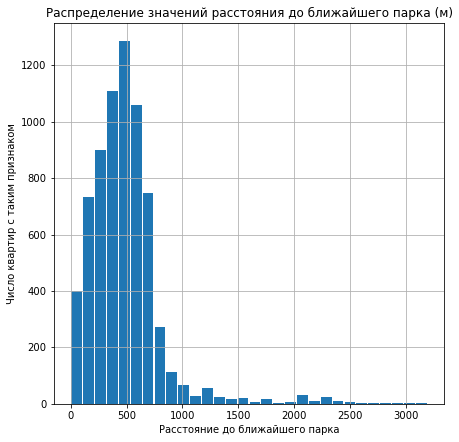

In [247]:
df['parks_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений расстояния до ближайшего парка (м)')
plt.show()

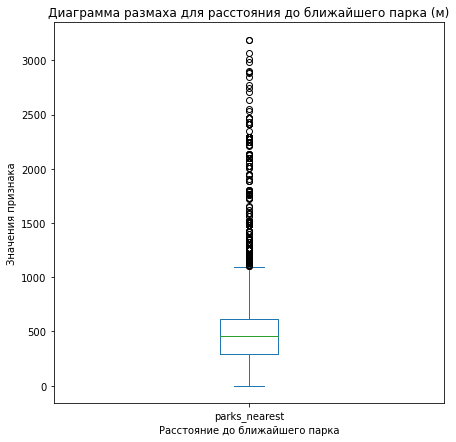

In [248]:
df['parks_nearest'].plot(kind='box', figsize=(7,7))

plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для расстояния до ближайшего парка (м)')
plt.show()

Если мы удалим хотя бы 1% выбросов, мы потеряем около 14 тыс. данных. Можно не удалять выбросы, а пропущенные значения заменить на медиану по группам.

In [249]:
print('Сколько наблюдений в массиве на данный момент:', df.shape[0])

Сколько наблюдений в массиве на данный момент: 20162


In [250]:
quantile99 = df['parks_nearest'].quantile(0.99)
print('Сколько наблюдений останется, если удалим 1% выбросов:', df.query('parks_nearest < @quantile99').shape[0])

Сколько наблюдений останется, если удалим 1% выбросов: 6870


К сожалению, замена пропущенных значений также не сработает. Из-за того, что в переменной 13,2 тыс. пропусков, заменив их на среднее или медиану мы исказим реальное распределение. Оно станет "приплюснутым". Это связано с тем, что самое популярное значение переменной будет его средним (или медианой). Замена не сработает, даже если мы произведем её по группам. Проиллюстрируем это на конкретном примере.

В каждой из групп (деревня, посёлок городского типа, село и садовое товарищество) нет значения ни для одного населённого пункта. Оставляем эти пропуски в массиве.

In [251]:
print('Кол-во пропусков для "деревень":', df.loc[df['locality_type'] == 'деревня', 'parks_nearest'].isna().sum())

print('Кол-во пропусков для "посёлков городского типа":', \
      df.loc[df['locality_type'] == 'посёлок городского типа', 'parks_nearest'].isna().sum())

print('Кол-во пропусков для "сёл":', df.loc[df['locality_type'] == 'село', 'parks_nearest'].isna().sum())

print('Кол-во пропусков для "садовых товариществ":', \
      df.loc[df['locality_type'] == 'садовое товарищество', 'parks_nearest'].isna().sum())

Кол-во пропусков для "деревень": 778
Кол-во пропусков для "посёлков городского типа": 456
Кол-во пропусков для "сёл": 25
Кол-во пропусков для "садовых товариществ": 5


Попробуем заменить пропуски для городов и посёлков медианным значением в группе, чтобы минимизировать влияние возможных выбросов.

In [252]:
print('Кол-во пропусков для "городов":', \
      df.loc[df['locality_type'] == 'город', 'parks_nearest'].isna().sum())

print('Кол-во пропусков для "посёлков":', \
      df.loc[df['locality_type'] == 'посёлок', 'parks_nearest'].isna().sum())

Кол-во пропусков для "городов": 10213
Кол-во пропусков для "посёлков": 1702


In [296]:
# создадим копию массива, который будем использовать для иллюстрации

df_test3 = df.copy()

city_median = df_test3.loc[df_test3['locality_type'].isin(['город']), 'parks_nearest'].median()

df_test3.loc[df_test3['locality_type'].isin(['город']), 'parks_nearest'] = \
df_test3.loc[df_test3['locality_type'].isin(['город']), 'parks_nearest'].fillna(city_median)

In [297]:
village_median = df_test3.loc[df_test3['locality_type'].isin(['посёлок']), 'parks_nearest'].median()

df_test3.loc[df_test3['locality_type'].isin(['посёлок']), 'parks_nearest'] = \
df_test3.loc[df_test3['locality_type'].isin(['посёлок']), 'parks_nearest'].fillna(village_median)

В результате мы получили искаженные данные.

In [298]:
df_test3['parks_nearest'].describe()

count   18,874.00
mean       489.78
std        216.41
min          1.00
25%        455.00
50%        455.00
75%        492.00
max      3,190.00
Name: parks_nearest, dtype: float64

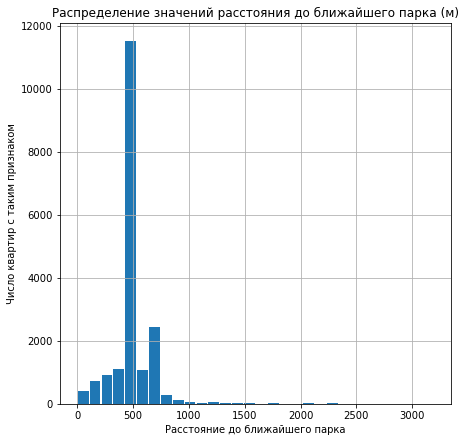

In [299]:
df_test3['parks_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений расстояния до ближайшего парка (м)')
plt.show()

Поэтому предлагается не удалять пропуски и не заменять их медиаными или средним значением. Оставим их в массиве данных, зато не исказим распределение и сохраним большинство наблюдений.

#### Переменные ponds_around3000, ponds_nearest

Перейдем к изучению переменной `ponds_around3000`. На гистограмме видно, что выбросы для переменной не наблюдаются. Заполним пропуски в данных средним значением по группам.

In [257]:
df['ponds_around3000'].describe()

count   15,698.00
mean         0.75
std          0.93
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: ponds_around3000, dtype: float64

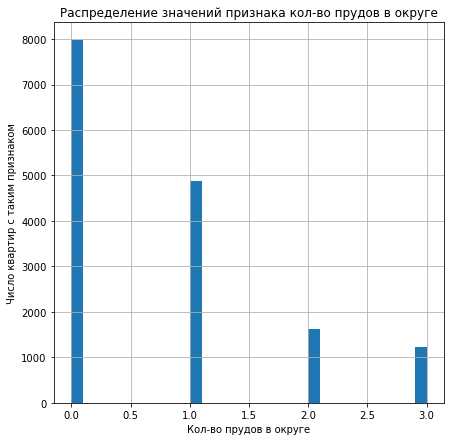

In [258]:
df['ponds_around3000'].hist(bins=30, figsize=(7,7))

plt.xlabel('Кол-во прудов в округе')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений признака кол-во прудов в округе')
plt.show()

В каждой из групп (деревня, посёлок городского типа, село и садовое товарищество) нет значения ни для одного населённого пункта. Оставляем эти пропуски в массиве.

In [259]:
print('Кол-во пропусков для "деревень":', df.loc[df['locality_type'] == 'деревня', 'ponds_around3000'].isna().sum())

print('Кол-во пропусков для "посёлков городского типа":', \
      df.loc[df['locality_type'] == 'посёлок городского типа', 'ponds_around3000'].isna().sum())

print('Кол-во пропусков для "сёл":', df.loc[df['locality_type'] == 'село', 'ponds_around3000'].isna().sum())

print('Кол-во пропусков для "садовых товариществ":', \
      df.loc[df['locality_type'] == 'садовое товарищество', 'ponds_around3000'].isna().sum())

Кол-во пропусков для "деревень": 778
Кол-во пропусков для "посёлков городского типа": 456
Кол-во пропусков для "сёл": 25
Кол-во пропусков для "садовых товариществ": 5


Пропуски в переменной `ponds_around3000` для городов и посёлков мы заменяем медианным значением в группе.

In [260]:
print('Кол-во пропусков для "городов":', df.loc[df['locality_type'] == 'город', 'ponds_around3000'].isna().sum())

print('Кол-во пропусков для "посёлков":', \
      df.loc[df['locality_type'] == 'посёлок', 'ponds_around3000'].isna().sum())

Кол-во пропусков для "городов": 2259
Кол-во пропусков для "посёлков": 935


In [261]:
city_median = df.loc[df['locality_type'].isin(['город']), 'ponds_around3000'].median()

df.loc[df['locality_type'].isin(['город']), 'ponds_around3000'] = \
df.loc[df['locality_type'].isin(['город']), 'ponds_around3000'].fillna(city_median)

In [262]:
village_median = df.loc[df['locality_type'].isin(['посёлок']), 'ponds_around3000'].median()

df.loc[df['locality_type'].isin(['посёлок']), 'ponds_around3000'] = \
df.loc[df['locality_type'].isin(['посёлок']), 'ponds_around3000'].fillna(village_median)

In [263]:
df['ponds_around3000'].describe()

count   18,892.00
mean         0.74
std          0.87
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          3.00
Name: ponds_around3000, dtype: float64

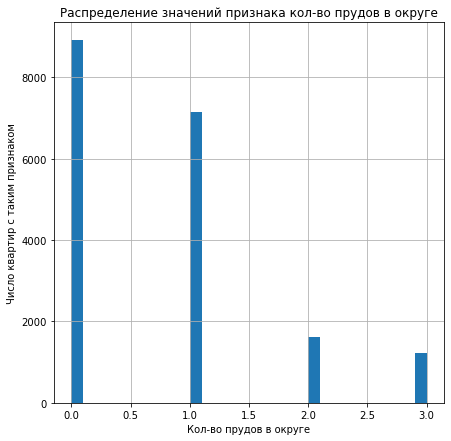

In [264]:
df['ponds_around3000'].hist(bins=30, figsize=(7,7))

plt.xlabel('Кол-во прудов в округе')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений признака кол-во прудов в округе')
plt.show()

Наконец, перейдем к изучению переменной `ponds_nearest`. Всего в выборке 12,4 тыс. пропусков. 

In [265]:
print('Кол-во пропусков в переменной "ponds_nearest":', df['ponds_nearest'].isna().sum())

Кол-во пропусков в переменной "ponds_nearest": 12434


Из гистограммы и диаграммы разброса мы видим, что в распределении переменной нет выбросов. Значит, можем перейти к заполнению пропусков.

In [266]:
df['ponds_nearest'].describe()

count   7,728.00
mean      522.15
std       276.12
min        13.00
25%       301.00
50%       506.00
75%       733.00
max     1,344.00
Name: ponds_nearest, dtype: float64

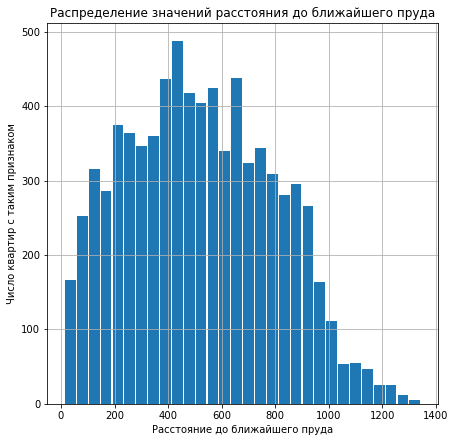

In [267]:
df['ponds_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Расстояние до ближайшего пруда')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений расстояния до ближайшего пруда')
plt.show()

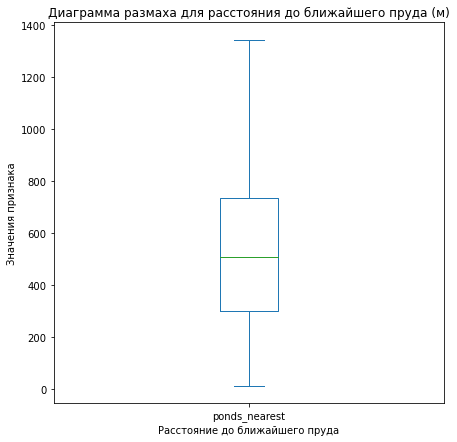

In [268]:
df['ponds_nearest'].plot(kind='box', figsize=(7,7))

plt.xlabel('Расстояние до ближайшего пруда')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для расстояния до ближайшего пруда (м)')
plt.show()

Но из-за того, что в данных много пропусков, заменив все на медиану или среднее мы исказим распределение. Будет наблюдаться ситуация, аналогичная той, что произошла с переменной `parks_nearest`. Распределение станет приплюснутым. Происслюстрируем это на примере, заменив пропуски на медиану.

В каждой из групп (деревня, посёлок городского типа, село и садовое товарищество) нет значения ни для одного населённого пункта. Оставляем эти пропуски в массиве.

In [269]:
print('Кол-во пропусков для "деревень":', df.loc[df['locality_type'] == 'деревня', 'ponds_nearest'].isna().sum())

print('Кол-во пропусков для "посёлков городского типа":', \
      df.loc[df['locality_type'] == 'посёлок городского типа', 'ponds_nearest'].isna().sum())

print('Кол-во пропусков для "сёл":', df.loc[df['locality_type'] == 'село', 'ponds_nearest'].isna().sum())

print('Кол-во пропусков для "садовых товариществ":', \
      df.loc[df['locality_type'] == 'садовое товарищество', 'ponds_nearest'].isna().sum())

Кол-во пропусков для "деревень": 778
Кол-во пропусков для "посёлков городского типа": 456
Кол-во пропусков для "сёл": 25
Кол-во пропусков для "садовых товариществ": 5


Пропуски в переменной `ponds_nearest` для городов и посёлков мы заменяем медианным значением в группе, чтобы минимизировать влияние возможных выбросов.

In [270]:
print('Кол-во пропусков для "городов":', \
      df.loc[df['locality_type'] == 'город', 'ponds_nearest'].isna().sum())

print('Кол-во пропусков для "посёлков":', \
      df.loc[df['locality_type'] == 'посёлок', 'ponds_nearest'].isna().sum())

Кол-во пропусков для "городов": 9638
Кол-во пропусков для "посёлков": 1515


In [300]:
df_test4 = df.copy()

city_median = df_test4.loc[df_test4['locality_type'].isin(['город']), 'ponds_nearest'].median()

df_test4.loc[df_test4['locality_type'].isin(['город']), 'ponds_nearest'] = \
df_test4.loc[df_test4['locality_type'].isin(['город']), 'ponds_nearest'].fillna(city_median)

In [301]:
village_median = df_test4.loc[df_test4['locality_type'].isin(['посёлок']), 'ponds_nearest'].median()

df_test4.loc[df_test4['locality_type'].isin(['посёлок']), 'ponds_nearest'] = \
df_test4.loc[df_test4['locality_type'].isin(['посёлок']), 'ponds_nearest'].fillna(village_median )

В результате мы получили искаженные данные.

In [302]:
df_test4['ponds_nearest'].describe()

count   18,881.00
mean       518.10
std        178.28
min         13.00
25%        503.00
50%        503.00
75%        579.00
max      1,344.00
Name: ponds_nearest, dtype: float64

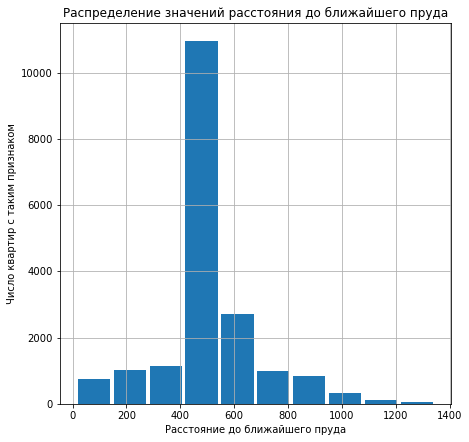

In [303]:
df_test4['ponds_nearest'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Расстояние до ближайшего пруда')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение значений расстояния до ближайшего пруда')
plt.show()

Поэтому предлагается не удалять пропуски и не заменять их медиаными или средним значением. Оставим их в массиве данных, зато не исказим распределение и сохраним большинство наблюдений.

#### Переменная days_exposition

В завершении данного раздела изучим пропуски в переменной `days_exposition` (сколько дней было размещено объявление от публикации до снятия). Аномальные значения в данных отсутсвуют. Возможно пропуски в этой переменной связаны с тем, что объявление еще не сняли с публикации на момент выгрузки данных. Эти пропуски предлагается оставить в массиве данных, поскольку аномальных или выдающихся значений не наблюдается.

In [304]:
df['days_exposition'].describe()

count   17,411.00
mean       184.74
std        220.84
min          1.00
25%         45.00
50%        101.00
75%        238.50
max      1,580.00
Name: days_exposition, dtype: float64

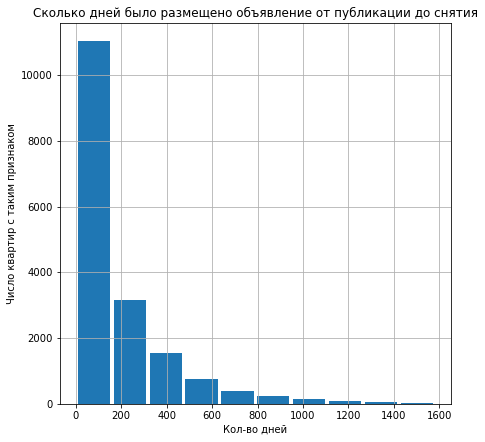

In [305]:
df['days_exposition'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Кол-во дней')
plt.ylabel('Число квартир с таким признаком')
plt.title('Сколько дней было размещено объявление от публикации до снятия')
plt.show()

In [307]:
# приводим в порядок индексы после удаления переменных

df = df.reset_index(drop=True)
df.shape[0]

20162

In [308]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4483
cityCenters_nearest      4465
parks_around3000         1270
parks_nearest           13203
ponds_around3000         1270
ponds_nearest           12434
days_exposition          2751
locality_name2              0
locality_type               0
dtype: int64

**Вывод:** Мы изучили распределение переменных `living_area`, `kitchen_area`, `floors_total`, `ceiling_height`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и  `days_exposition` и выявили выбросы. Мы избавились от большинства выбросов в данных и при этом постарались не повлиять на изначальное распределение данных и сохранить размер выборки. После того, как выбросы были удалены, мы заполнили пропущенные значения практически во всех переменных, где они были. Для заполнения пропусков чаще всего использовалась медиана. Подходы, основанные на логике мы использовали при замене переменных `balcony`, `is_apartment` и `ceiling_height`. Мы оставили пропуски в тех переменных, где не получилось их восстановить на основе имеющихся данных. При этом удалить эти наблюдения из выборки мы не можем: переменные, указывающие на дистанцию до точки (`airports_nearest` и проч.), связаны с определенными типами местностями (деревни, сёла и т.д.). Их удаление приведет к исключению ряда категорий типов местности из выборки, а также значительному сокращению наблюдений. Мы также не заменяли и не удаляли пропуски в том случае, если замена может исказить изначальное распределение (переменные `parks_nearest` и `ponds_nearest`). Пропуски в переменной `days_exposition` – скорее технические, связанные с человеческим фактором. Мы не можем удалить их, поскольку наблюдений много. Но также не представляется возможным заменить их на основе логики. Поэтому было принятно решение оставить их.

### Изменение типов данных

Преобразуем данные в столбце `first_day_exposition` (дата публикации) из строкового в формат дата-время.

In [309]:
df['first_day_exposition'] = \
pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Преобразуем данные в столбцах `floors_total`, `balcony`, `is_apartment`, `studio`, `open_plan` так, чтобы значения были целочисленными.

In [310]:
col_names = ['floors_total', 'balcony', 'is_apartment', 'studio', 'open_plan', 'last_price']

for cols in col_names:
    df[cols] = df[cols].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20162 entries, 0 to 20161
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20162 non-null  int64         
 1   last_price            20162 non-null  int64         
 2   total_area            20162 non-null  float64       
 3   first_day_exposition  20162 non-null  datetime64[ns]
 4   rooms                 20162 non-null  int64         
 5   ceiling_height        20162 non-null  float64       
 6   floors_total          20162 non-null  int64         
 7   living_area           20162 non-null  float64       
 8   floor                 20162 non-null  int64         
 9   is_apartment          20162 non-null  int64         
 10  studio                20162 non-null  int64         
 11  open_plan             20162 non-null  int64         
 12  kitchen_area          20162 non-null  float64       
 13  balcony         

Остальные переменные не требуют преобразования. Некоторые из них – не могут быть преобразованы. В частности переменные `parks_around3000` и `ponds_around3000`, которые по факту являются целочисленными, но не могут быть преобразованы из-за того, что было принято решение сохранить пропуски в данных.

**Вывод:** Был изменен тип данных у переменных `floors_total`, `balcony`, `is_apartment`, `studio`, `open_plan` и `first_day_exposition`.

### Устранение редких и выбивающихся значений (аномалий)

Выбросы в перемнных `living_area`, `kitchen_area`, `floors_total`, `ceiling_height` и `days_exposition` были изучены и удалены во время удаления и замены пропусков. Выбросы в переменных `airports_nearest`, `cityCenters_nearest`, `parks_nearest` были оставлены в выборке, т.к. удаление даже незначительного количества выбросов могло привести к потере большого количества наблюдений. Выбросы в переменной `ponds_nearest` не были выявлены. Остальные переменные будут изучены далее.

Изучим переменную `total_images`. Из гистограммы и диаграммы разброса видно, что в данных присутсвуют выбросы.

In [311]:
df['total_images'].describe()

count   20,162.00
mean        10.09
std          5.67
min          0.00
25%          6.00
50%         10.00
75%         14.00
max         50.00
Name: total_images, dtype: float64

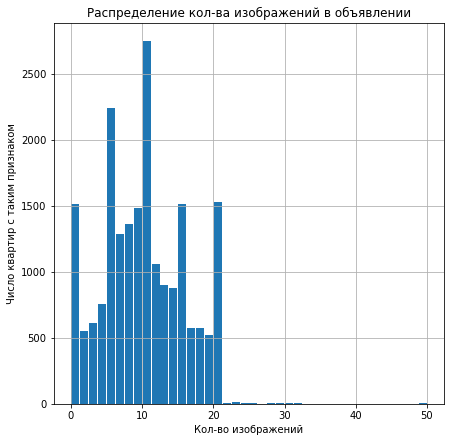

In [312]:
df['total_images'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Кол-во изображений')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение кол-ва изображений в объявлении')
plt.show()

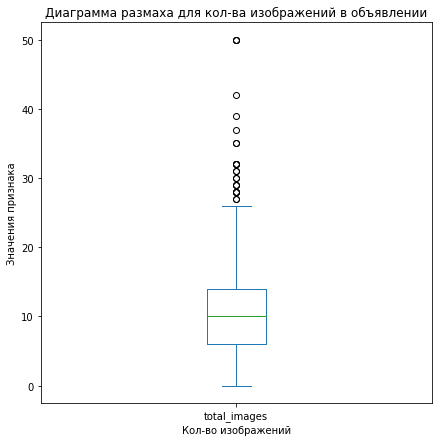

In [313]:
df['total_images'].plot(kind='box', figsize=(7,7))

plt.xlabel('Кол-во изображений')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для кол-ва изображений в объявлении')
plt.show()

Предлагается удалить 1% выбросов, при этом мы потеряем только 1% наблюдений и не потеряем такие редкие наблюдения как деревни и проч.

In [314]:
df = df.query('total_images < @quantile99').copy()

In [315]:
df['total_images'].describe()

count   20,162.00
mean        10.09
std          5.67
min          0.00
25%          6.00
50%         10.00
75%         14.00
max         50.00
Name: total_images, dtype: float64

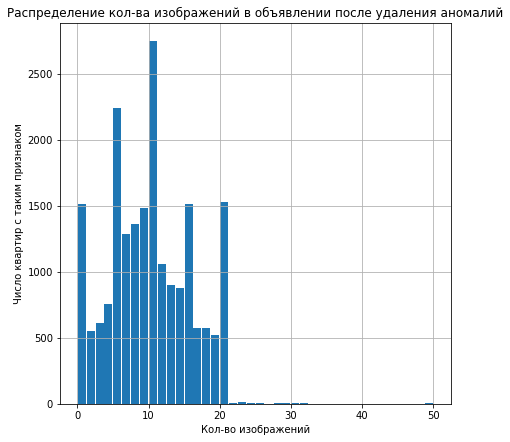

In [316]:
df['total_images'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Кол-во изображений')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение кол-ва изображений в объявлении после удаления аномалий')
plt.show()

Рассмотрим переменную `last_price`. Исходя из описательных статистик и гистограммы, мы можем сделать вывод, что в данных нет аномалий, но есть редкие значения. Из диаграммы разброса видно, что редкими являются квартиры дороже 11 млн.

In [317]:
df['last_price'].describe()

count        20,162.00
mean      6,128,398.31
std       6,251,455.16
min         430,000.00
25%       3,500,000.00
50%       4,700,000.00
75%       6,750,000.00
max     289,238,400.00
Name: last_price, dtype: float64

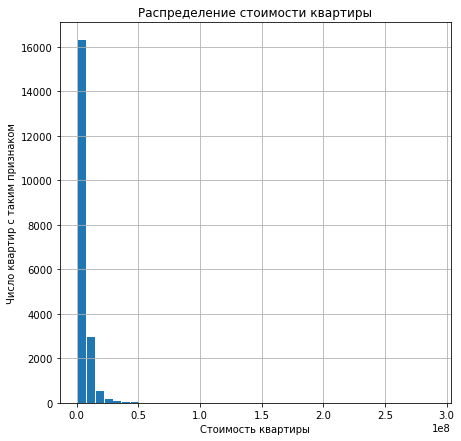

In [318]:
df['last_price'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Стоимость квартиры')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение стоимости квартиры')
plt.show()

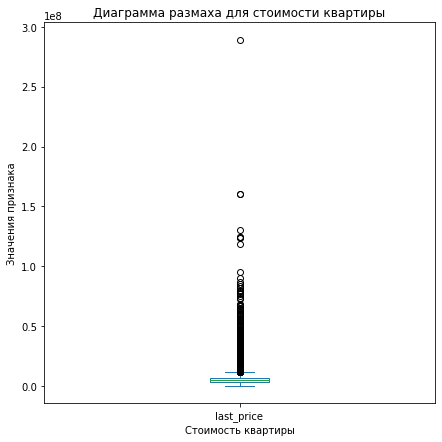

In [319]:
df['last_price'].plot(kind='box', figsize=(7,7))

plt.xlabel('Стоимость квартиры')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для стоимости квартиры')
plt.show()

Результаты анализа сводной таблицы показывают, что эти значения вполне могут быть реальными: большой метраж, город (большинство таких квартир находится в Питере).

In [320]:
expensive_flats = (df
                   .query('last_price > 10000000')
                   .pivot_table(index='locality_name', values=['total_area', 'last_price'], 
                                aggfunc={'total_area':['mean', 'count'],'last_price': 'median'})
)

expensive_flats.columns = ['median_price', 'count', 'area_mean']
expensive_flats.sort_values(by='count', ascending=False, inplace=True)

display(expensive_flats)

,median_price,count,area_mean
locality_name,,,
Санкт-Петербург,"13,850,000.00",2062,112.10
Пушкин,"14,200,000.00",30,121.17
Сестрорецк,"13,333,000.00",13,100.67
Петергоф,"12,000,000.00",7,135.77
unknown,"14,770,000.00",6,109.33
Павловск,"11,150,000.00",4,113.28
Всеволожск,"10,945,000.00",4,80.91
посёлок Шушары,"10,700,000.00",3,120.13
посёлок Стрельна,"15,500,000.00",3,175.73


Подозрительно выглядит стоиомость квартир в поселках и деревнях. Нехватает информации для того, чтобы перепроверить правдивость данных. Чтобы эти выбросы не повлияли на результаты анализа, предлагается частично исключить их из выборки (уберем 1% от данных).

In [321]:
quantile99 = df['last_price'].quantile(0.99)
print('Сколько данных останется в выборке:', df.query('last_price < @quantile99').shape[0])

Сколько данных останется в выборке: 19960


In [322]:
df = df.query('last_price < @quantile99').copy()

In [323]:
df['last_price'].describe()

count       19,960.00
mean     5,709,193.00
std      3,728,976.51
min        430,000.00
25%      3,500,000.00
50%      4,690,000.00
75%      6,680,000.00
max     28,570,000.00
Name: last_price, dtype: float64

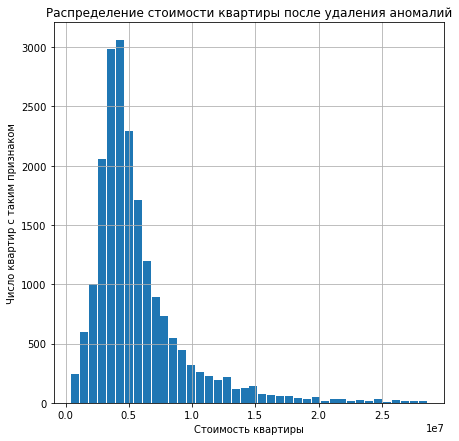

In [324]:
df['last_price'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Стоимость квартиры')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение стоимости квартиры после удаления аномалий')
plt.show()

После исключения выбросов распределение цены стало выглядеть более правдоподобным. Оно напоминает нормальное распределение, колокол которого смещен влево.

Теперь изучим переменную `total_area`. В данных нет аномалий, но есть редкие значения. Из диаграммы разброса видно, что редкими являются квартиры с общей площадью квартиры более чем 108 м².

In [325]:
df['total_area'].describe()

count   19,960.00
mean        58.23
std         25.57
min         20.00
25%         40.50
50%         52.00
75%         69.00
max        336.00
Name: total_area, dtype: float64

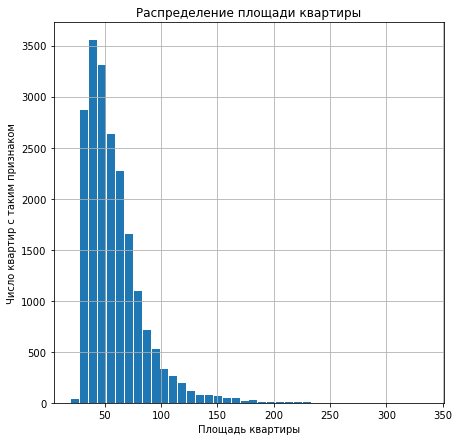

In [326]:
df['total_area'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Площадь квартиры')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение площади квартиры')
plt.show()

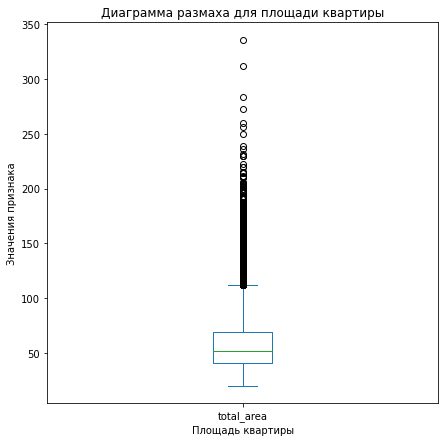

In [327]:
df['total_area'].plot(kind='box', figsize=(7,7))

plt.xlabel('Площадь квартиры')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для площади квартиры')
plt.show()

Из сводной таблицы видно, что в "лидерах" снова Питер. Примечательно, что в выбросах много посёлков городского типа. Возможно это частный сектор с большой территорией. Не очень правдоподобно выглядит соотношение количества комнат, метража и стоимости, поэтому чтобы эти выбросы не повлияли на результаты анализа, предлагается их исключить частично из выборки.

In [328]:
big_flats = (df
             .query('total_area > 100')
             .pivot_table(index='locality_name', values=['total_area', 'last_price', 'rooms'], 
                          aggfunc={'total_area':['mean', 'count'],'last_price': 'median', 'rooms':'mean'})
)

big_flats.columns = ['median_price', 'rooms_mean', 'count', 'area_mean']
big_flats.sort_values(by='count', ascending=False, inplace=True)

display(big_flats.head())

,median_price,rooms_mean,count,area_mean
locality_name,,,,
Санкт-Петербург,"14,000,000.00",3.86,1087,128.99
Пушкин,"15,641,000.00",3.35,20,137.89
Выборг,"7,200,000.00",3.54,13,128.69
Сестрорецк,"8,700,000.00",3.08,13,119.62
посёлок Шушары,"7,515,000.00",4.00,8,112.74


Вновь предлагается использовать значение 0.99 квантиля как порог для удаления выбросов – удаляем 1% данных.

In [329]:
quantile99 = df['total_area'].quantile(0.99)
print('Сколько данных останется в массиве:', df.query('total_area < @quantile99').shape[0])

Сколько данных останется в массиве: 19760


In [330]:
df = df.query('total_area < @quantile99').copy()

In [331]:
df['total_area'].describe()

count   19,760.00
mean        56.99
std         22.33
min         20.00
25%         40.21
50%         52.00
75%         68.00
max        152.50
Name: total_area, dtype: float64

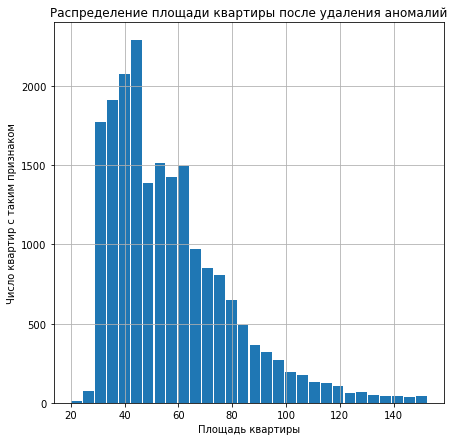

In [332]:
df['total_area'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Площадь квартиры')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение площади квартиры после удаления аномалий')
plt.show()

По результатам исключения выбросов мы видим, что распределение переменной `total_area` напоминает нормальное, немного смещено влево. Выглядит оно вполне реалистично.

Рассмотрим переменную `rooms` (количество комнат). Выбросов не наблюдается.

In [333]:
df['rooms'].describe()

count   19,760.00
mean         2.03
std          0.94
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          8.00
Name: rooms, dtype: float64

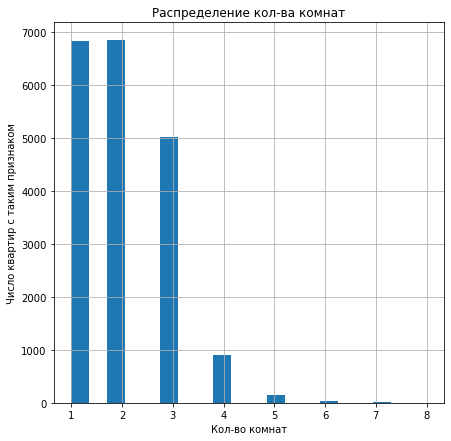

In [334]:
df['rooms'].hist(bins=20, figsize=(7,7))

plt.xlabel('Кол-во комнат')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение кол-ва комнат')
plt.show()

Изучим переменную `floor`.

In [335]:
df['floor'].describe()

count   19,760.00
mean         5.88
std          4.82
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: float64

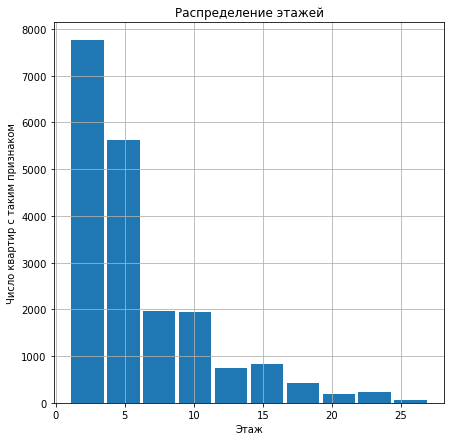

In [336]:
df['floor'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Этаж')
plt.ylabel('Число квартир с таким признаком')
plt.title('Распределение этажей')
plt.show()

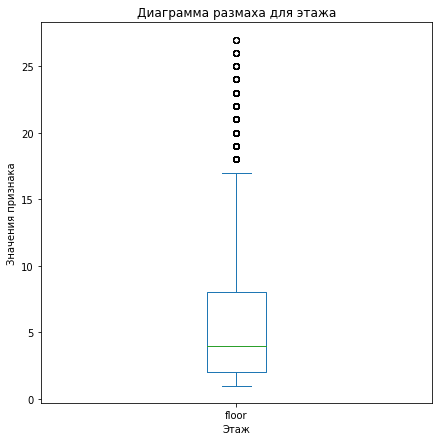

In [337]:
df['floor'].plot(kind='box', figsize=(7,7))

plt.xlabel('Этаж')
plt.ylabel('Значения признака')
plt.title('Диаграмма размаха для этажа')
plt.show()

Несмотря на то, что некоторые этажи отмечены как выбросы, ничего странного в данных нет. Из сводной таблицы видно, что количество этаже не превышает размера стандартной высокоэтажки. Предлагается оставить наблюдения.

In [338]:
high_floor = (df[df['floor'] > 15]
              .pivot_table(index='locality_name', values='floors_total')
)

high_floor.columns = ['floors_total_mean']
display(high_floor.sort_values(by='floors_total_mean', ascending=False).head())

,floors_total_mean
locality_name,
посёлок Парголово,25.67
поселок городского типа Дубровка,25.00
Колпино,24.00
посёлок Мурино,23.67
unknown,23.67


In [339]:
df = df.reset_index(drop=True)

In [340]:
print('Всего наблюдений в массиве данных:', df.shape[0])

Всего наблюдений в массиве данных: 19760


**Вывод:** Мы постарались максимально удалить выбросы из выборки, при этом сохранив её изначальное распределение. В результате мы получили 19760 наблюдений с оставленными/замененными пропусками.

### Добавление новых переменных

Для того, чтобы определить цену одного квадратного метра необходимо общую площадь разделить на стоимость квартиры (цена на момент снятия с публикации).

In [341]:
df['one_metre_price'] = df['last_price']/df['total_area']
display(df[['last_price', 'total_area', 'one_metre_price']].head())

,last_price,total_area,one_metre_price
0,13000000,108.00,"120,370.37"
1,3350000,40.40,"82,920.79"
2,5196000,56.00,"92,785.71"
3,2890000,30.40,"95,065.79"
4,2900000,33.16,"87,454.76"


Получим переменные "день недели", "месяц" и "год" публикации объявления, использовав специальные методы пандас.

In [342]:
df['day_of_exposition'] = df['first_day_exposition'].dt.weekday
display(df[['day_of_exposition', 'first_day_exposition']].head())

,day_of_exposition,first_day_exposition
0,3,2019-03-07
1,1,2018-12-04
2,3,2015-08-20
3,0,2018-09-10
4,2,2018-05-23


In [343]:
df['month_of_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
display(df[['month_of_exposition', 'first_day_exposition']].head())

,month_of_exposition,first_day_exposition
0,3,2019-03-07
1,12,2018-12-04
2,8,2015-08-20
3,9,2018-09-10
4,5,2018-05-23


In [344]:
df['year_of_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
display(df[['year_of_exposition', 'first_day_exposition']].head())

,year_of_exposition,first_day_exposition
0,2019,2019-03-07
1,2018,2018-12-04
2,2015,2015-08-20
3,2018,2018-09-10
4,2018,2018-05-23


In [345]:
df['month_of_exposition2'] = df['first_day_exposition'].astype('datetime64[M]')
display(df[['month_of_exposition2', 'first_day_exposition']].head())

,month_of_exposition2,first_day_exposition
0,2019-03-01,2019-03-07
1,2018-12-01,2018-12-04
2,2015-08-01,2015-08-20
3,2018-09-01,2018-09-10
4,2018-05-01,2018-05-23


Для того, чтобы категоризировать переменную `floor` (этаж) на "первый", "последний", "другой" напишем функцию, которая будет сравнивать значения переменной `floor` (этаж квартиры) и `floors_total` (всего этажей в доме). Если этаж квартиры совпадает со значением в переменной "всего этажей в доме", то квартира находится на последнем этаже. Если указан первый этаж, то на первом. Если указан какой-либо другой этаж – квартира находится на "другом" этаже. 

In [346]:
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

In [347]:
df['floor_cat'] = df.apply(floor_cat, axis=1)
display(df[['floor', 'floors_total', 'floor_cat']].head(10))

,floor,floors_total,floor_cat
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,5,12,другой
4,26,27,другой
5,7,9,другой
6,3,12,другой
7,4,5,другой
8,5,5,последний
9,5,5,последний


Далее рассчитаем расстояние до центра города в километрах (переведем метры в километры и округлим до целых значений).

In [348]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']*0.001)
display(df[['cityCenters_nearest', 'cityCenters_nearest_km']].head(3))

,cityCenters_nearest,cityCenters_nearest_km
0,"16,028.00",16.00
1,"18,603.00",19.00
2,"13,933.00",14.00


### Исследовательский анализ данных

Изучим параметр "общая площадь" (переменная `total_area`). Посмотрим на описательные статистики и гистограмму.

In [349]:
df['total_area'].describe()

count   19,760.00
mean        56.99
std         22.33
min         20.00
25%         40.21
50%         52.00
75%         68.00
max        152.50
Name: total_area, dtype: float64

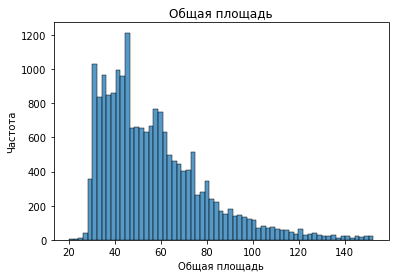

In [350]:
figure = sns.histplot(x=df['total_area'])

figure.set(xlabel = 'Общая площадь', ylabel = 'Частота')
plt.title('Общая площадь')
plt.show()

Распределение смещено влево, выбросы и выдающиеся значения были удалены на этапе предобработки. Больше всего квартир размером 30-45 м². Изучим эти квартиры.

In [351]:
popular_flats = (df
                 .query('30 < total_area < 45')
                 .pivot_table(index='locality_name', values=['last_price', 'total_area'], aggfunc='median')
)

display(popular_flats.sort_values(by='total_area', ascending=False))

,last_price,total_area
locality_name,,
посёлок Коробицыно,1400000,44.90
посёлок городского типа Тайцы,2200000,44.80
городской посёлок Лесогорский,1050000,44.80
деревня Реброво,1750000,44.60
деревня Заклинье,1450000,44.30
...,...,...
поселок станции Вещево,660000,30.85
поселок Глебычево,1100000,30.70
деревня Чудской Бор,500000,30.70


**Вывод:** Данные смещены влево, ближе к нулю. Минимальное значение площади – 20 м², максимальное – 149.6 м². Из гистограммы можно выделить группу часто встречающихся квартир – 30-45 м².

Далее изучим переменную "жилая площадь" (`living_area`). Эта переменная сильно кореллирует со значениями переменной `total_area` (коэффициент корелляции равен 0.92), что не удивительно. С ростом жилой площади растет и общая пложадь квартиры.

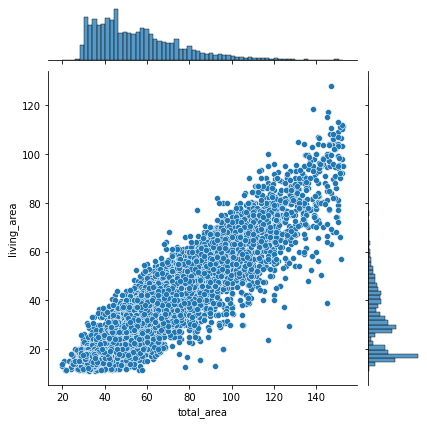

In [352]:
sns.jointplot(x='total_area', y='living_area', 
              data=df, kind='scatter')

plt.show()

In [353]:
df['total_area'].corr(df['living_area'])

0.9250165641961458

Теперь более внимательно изучим распределение переменной `living_area`.

In [354]:
df['living_area'].describe()

count   19,760.00
mean        32.61
std         15.39
min         11.20
25%         18.60
50%         30.00
75%         42.00
max        128.00
Name: living_area, dtype: float64

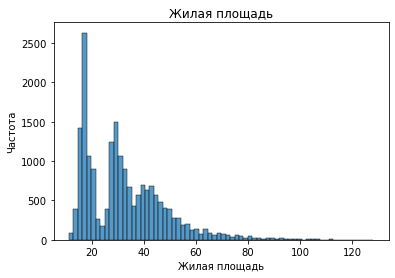

In [355]:
figure = sns.histplot(x=df['living_area'])

figure.set(xlabel = 'Жилая площадь', ylabel = 'Частота')
plt.title('Жилая площадь')
plt.show()

Распределение бимодальое – имеется две вершины. Выбросы и выдающиеся значения были удалены на этапе предобработки. Больше всего квартир с жилой площадью размером 17-20 м². Второй по величине является группа квартир с жилой площадью 27-32 м². Изучим эти квартиры.

In [356]:
small_flats = (df
                 .query('17 < living_area < 20')
                 .pivot_table(index='locality_name', values=['last_price', 'living_area'], aggfunc='median')
)

display(small_flats.sort_values(by='living_area', ascending=False))

,last_price,living_area
locality_name,,
посёлок Сапёрный,2250000,19.50
поселок Поляны,2100000,19.50
поселок Стеклянный,1950000,19.40
посёлок Сосново,1900000,19.20
посёлок Старая Малукса,1600000,19.10
...,...,...
Волосово,1505000,17.15
деревня Пудомяги,1680000,17.10
поселок городского типа Никольский,700000,17.10


In [357]:
medium_flats = (df
                 .query('27 < living_area < 32')
                 .pivot_table(index='locality_name', values=['last_price', 'living_area'], aggfunc='median')
)

display(medium_flats.sort_values(by='living_area', ascending=False))

,last_price,living_area
locality_name,,
деревня Ваганово,2300000,31.90
деревня Кузьмолово,3800000,31.70
садовое товарищество Рахья,1700000,31.60
деревня Батово,2160000,31.50
поселок Громово,1250000,31.40
...,...,...
поселок Терволово,2400000,27.70
посёлок Сапёрное,1550000,27.70
деревня Ненимяки,2500000,27.70


**Вывод:** Переменная `living_area` сильно скореллирована с переменной `total_area`, связь между переменными положительная: с ростом одной переменной увеличивается вторая. Коэффициент корелляции равен 0.92. Минимальное значение переменной 11.2 м², максимальное – 128 м². Распределение переменной `living_area` бимодальное, можно выделить две группы квартир – с жилой площадью 17-20 м² и 27-32 м². В группе по величине жилплощади лидируют деревни, во второй – посёлки.

Теперь рассмотрим переменную "площадь кухни" `kitchen_area`. Переменная слабо скореллирована с `total_area` (коэффициент корелляции 0,5) и с переменной `living_area` (коэффициент корелляции 0,27).

In [358]:
df['kitchen_area'].describe()

count   19,760.00
mean        10.08
std          4.27
min          5.04
25%          7.00
50%          9.00
75%         11.50
max         39.70
Name: kitchen_area, dtype: float64

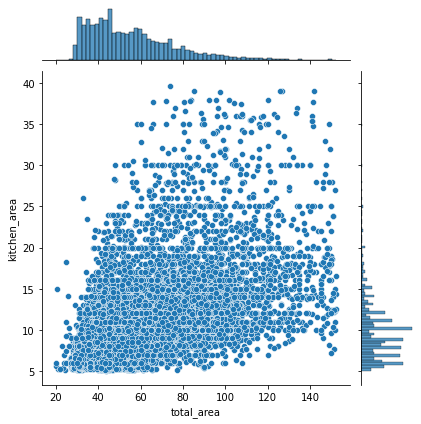

In [359]:
sns.jointplot(x='total_area', y='kitchen_area', 
              data=df, kind='scatter')
plt.show()

In [360]:
df['total_area'].corr(df['kitchen_area'])

0.5223985312131255

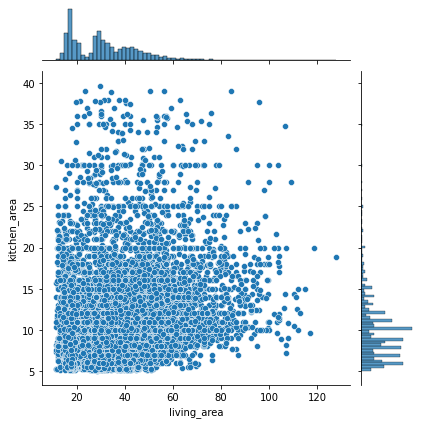

In [361]:
sns.jointplot(x='living_area', y='kitchen_area', 
              data=df, kind='scatter')

plt.show()

In [362]:
df['living_area'].corr(df['kitchen_area'])

0.2733049983193049

Изучим распределение переменной `kitchen_area`.

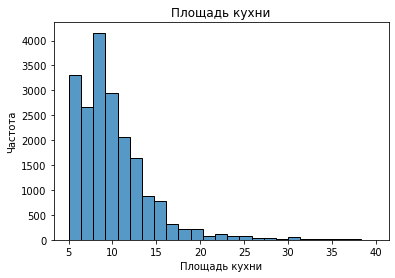

In [363]:
figure = sns.histplot(x=df['kitchen_area'], bins=25)

figure.set(xlabel = 'Площадь кухни', ylabel = 'Частота')
plt.title('Площадь кухни')
plt.show()

**Вывод:** Переменная `kitchen_area` слабо скореллирована с переменными `total_area` и `living_area`. Коэффициенты корелляции равны 0.5 и 0.25 соотвественно. Распределение переменной `kitchen_area` смещено влево. Минимальное значение равно 5.04, максимальное – 39.7.

Изучим переменную "цена объекта" `last_price`. Посмотрим на описательные статистики. Переменная средне скореллирована с переменной `total_area` (коэффициент корелляции 0.75). 

In [364]:
df['last_price'].describe()

count       19,760.00
mean     5,578,080.70
std      3,476,389.99
min        430,000.00
25%      3,500,000.00
50%      4,650,000.00
75%      6,550,000.00
max     28,570,000.00
Name: last_price, dtype: float64

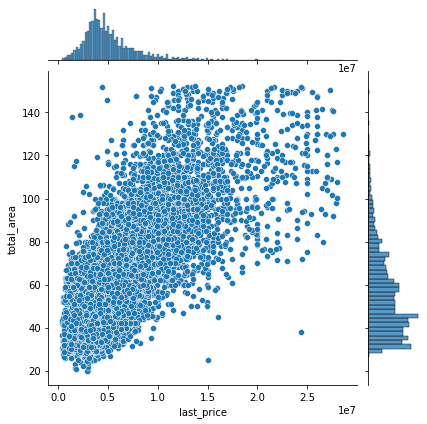

In [365]:
sns.jointplot(x='last_price', y='total_area', 
              data=df, kind='scatter')
plt.show()

In [366]:
df['last_price'].corr(df['total_area'])

0.7589687258086115

Изучим распределение переменной `last_price`.

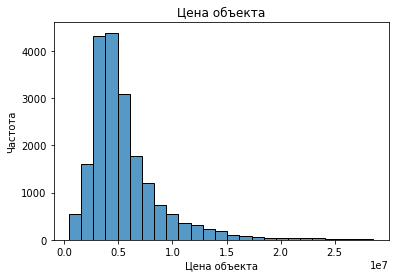

In [367]:
figure = sns.histplot(x=df['last_price'], bins=25)

figure.set(xlabel = 'Цена объекта', ylabel = 'Частота')
plt.title('Цена объекта')
plt.show()

**Вывод:** Переменная `last_price` немного смещена влево, но напоминает нормальное распределение. Минимальное значение – 430 тыс., максимальное –  26 млн. Эта переменная средне скореллирована с переменной `total_area` (коэффициент корелляции 0.75). Больше всего квартир на рынке, которые стоят от 3,5 до 4,5 млн. 

Изучим переменную "количество комнат" `rooms`.

In [368]:
df['rooms'].describe()

count   19,760.00
mean         2.03
std          0.94
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          8.00
Name: rooms, dtype: float64

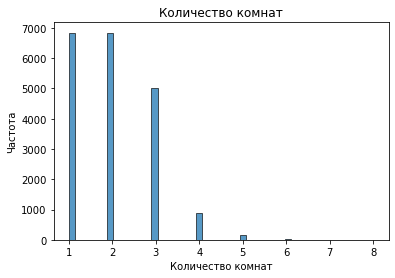

In [369]:
figure = sns.histplot(x=df['rooms'])

figure.set(xlabel = 'Количество комнат', ylabel = 'Частота')
plt.title('Количество комнат')
plt.show()

**Вывод:** Переменная `rooms` является дискретной и принимает значения от 1 (минимум) до 6(максимум). Больше всего на рынке однокомнатных и двухкомнатных квартир квартир.

Изучим переменную "высота потолков" `ceiling_height`.

In [370]:
df['ceiling_height'].describe()

count   19,760.00
mean         2.69
std          0.22
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64

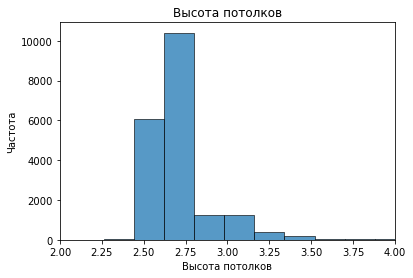

In [371]:
figure = sns.histplot(x=df['ceiling_height'], bins=50)

figure.set(xlabel = 'Высота потолков', ylabel = 'Частота')
plt.xlim(2, 4)
plt.title('Высота потолков')
plt.show()

**Вывод:** Распределение переменной смещено вправо. Максимальное значение переменной – 10 м, минимальное значение – 1 м. Больше всего на рынке квартир с потолками от 2.5 до 2.75 м.

In [372]:
df['floor'].describe()

count   19,760.00
mean         5.88
std          4.82
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: float64

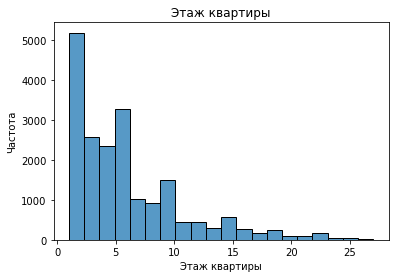

In [373]:
figure = sns.histplot(x=df['floor'], bins=20)

figure.set(xlabel = 'Этаж квартиры', ylabel = 'Частота')
plt.title('Этаж квартиры')
plt.show()

**Вывод:** Распределение переменной смещено вправо. Максимальное значение переменной – 27 этаж, минимальное значение – 1 этаж. Больше всего в выборке квар, которые находятся на 2 этаже, чуть меньше – на 6 этаже.

In [374]:
df['floor_cat'].describe()

count      19760
unique         3
top       другой
freq       14608
Name: floor_cat, dtype: object

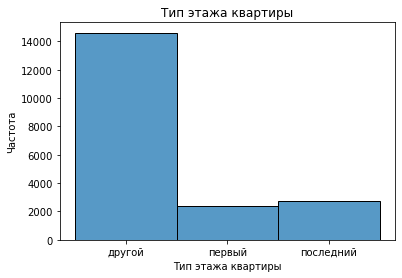

In [375]:
figure = sns.histplot(x=df['floor_cat'])

figure.set(xlabel = 'Тип этажа квартиры', ylabel = 'Частота')
plt.title('Тип этажа квартиры')
plt.show()

**Вывод:** Самое частый тип этажа – "другой", т.е. не первый и не последний. Последние этажи в выборке встречаются немного чаще, чем первые.

In [376]:
df['floors_total'].describe()

count   19,760.00
mean        10.69
std          6.47
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         29.00
Name: floors_total, dtype: float64

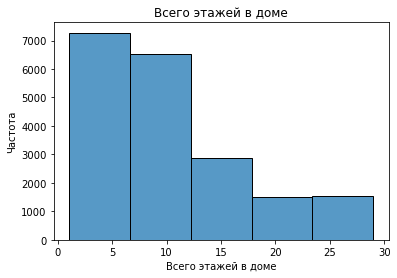

In [377]:
figure = sns.histplot(x=df['floors_total'], bins=5)

figure.set(xlabel = 'Всего этажей в доме', ylabel = 'Частота')
plt.title('Всего этажей в доме')
plt.show()

**Вывод:** Распределение переменной `floors_total` смещено влево. Максимальное количество этажей в домах – 29, минимальное – 1. Больше всего в выборке пятиэтажек. 

Рассмотрим переменную "расстояние до центра города в метрах" (`cityCenters_nearest`). Расстояние до центра средне скорелировано со стоимостью квартиры (коэффициент корелляции -0.4). Чем больше расстояние до центра, тем дешевле квартиры.

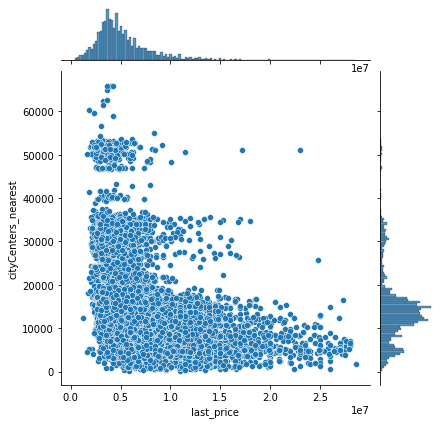

In [378]:
sns.jointplot(x='last_price', y='cityCenters_nearest', 
              data=df, kind='scatter')
plt.show()

In [379]:
df['last_price'].corr(df['cityCenters_nearest'])

-0.35482566842302554

Внимательнее изучим распредление переменной.

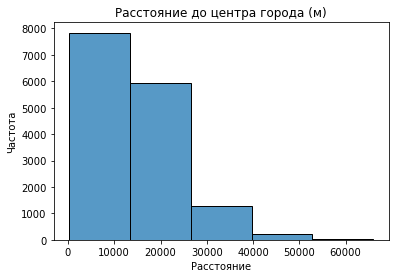

In [380]:
figure = sns.histplot(x=df['cityCenters_nearest'], bins=5)

figure.set(xlabel = 'Расстояние', ylabel = 'Частота')
plt.title('Расстояние до центра города (м)')
plt.show()

In [381]:
df['cityCenters_nearest'].describe()

count   15,305.00
mean    14,386.38
std      8,477.04
min        208.00
25%      9,814.00
50%     13,238.00
75%     16,275.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

**Вывод:** Максимальное значение переменной – 65,968 м, минимальное – 208 м. Распределение смещено влево. Переменная `cityCenters_nearest` слабо скореллирована с переменной `last_price` (коэффициент корелляции 0.4), характер взаимосвязи – отрицательный. С увеличением расстояния от центра падает цена квартиры.

Обратимся к переменной "расстояние до ближайшего аэропорта" (`airports_nearest`). 

In [382]:
df['airports_nearest'].describe()

count   15,287.00
mean    28,888.20
std     12,729.39
min          0.00
25%     18,419.00
50%     26,941.00
75%     37,412.00
max     84,869.00
Name: airports_nearest, dtype: float64

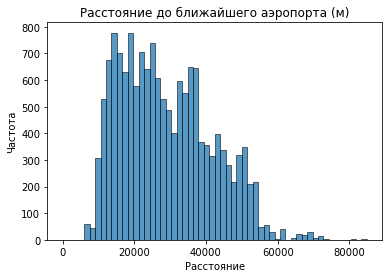

In [383]:
figure = sns.histplot(x=df['airports_nearest'])

figure.set(xlabel = 'Расстояние', ylabel = 'Частота')
plt.title('Расстояние до ближайшего аэропорта (м)')
plt.show()

**Вывод:** Распределение переменной напоминает нормальное. Минимальное значение переменной – 0 тыс. м, а максимальное – 84,8 тыс. м.

Рассмотрим распределение переменной "расстояние до ближайшего парка" (`parks_nearest`).

In [384]:
df['parks_nearest'].describe()

count   6,675.00
mean      492.72
std       338.68
min         1.00
25%       289.50
50%       457.00
75%       614.00
max     3,190.00
Name: parks_nearest, dtype: float64

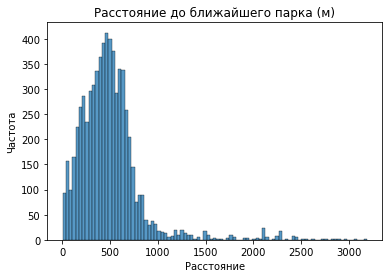

In [385]:
figure = sns.histplot(x=df['parks_nearest'])

figure.set(xlabel = 'Расстояние', ylabel = 'Частота')
plt.title('Расстояние до ближайшего парка (м)')
plt.show()

In [386]:
parks_spot = (df
            .query('400 < parks_nearest < 600')
            .pivot_table(index='locality_name', values='parks_nearest', aggfunc=['mean', 'count'])
)

parks_spot.columns = ['parks_nearest_mean', 'count']
display(parks_spot.sort_values(by='parks_nearest_mean', ascending=True).head(10))

,parks_nearest_mean,count
locality_name,,
Кронштадт,470.91,23
Сестрорецк,483.81,16
Красное Село,484.00,16
Пушкин,486.50,44
Колпино,492.50,34
unknown,497.67,3
Санкт-Петербург,497.91,1953
Ломоносов,501.33,6
Петергоф,502.31,29


**Вывод:** Распределение напоминает нормальное и смещено влево. Самые популярные значения переменной в выборке расположены в диапазоне от 400 до 600 м. Больше всего продается домов, находящихся в среднем на таком расстоянии от парков. Минимальное значение переменной – 1 м, а максимальное – 3,2 тыс. м.

Изучим переменную `ponds_nearest`.

In [387]:
df['ponds_nearest'].describe()

count   7,438.00
mean      525.94
std       275.83
min        13.00
25%       306.00
50%       511.00
75%       734.00
max     1,344.00
Name: ponds_nearest, dtype: float64

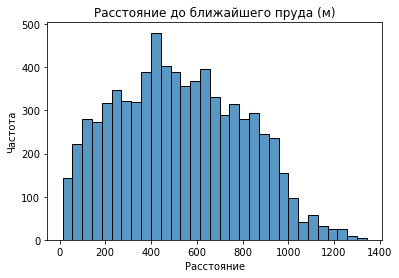

In [388]:
figure = sns.histplot(x=df['ponds_nearest'])

figure.set(xlabel = 'Расстояние', ylabel = 'Частота')
plt.title('Расстояние до ближайшего пруда (м)')
plt.show()

**Вывод:** Распределение переменной напоминает нормальное. Максимальное значение – 1,3 тыс. метров, минимально – 13 м.

Рассмотрим переменные "день" (`day_of_exposition`) и "месяц" (`month_of_exposition`) публикации объявления.

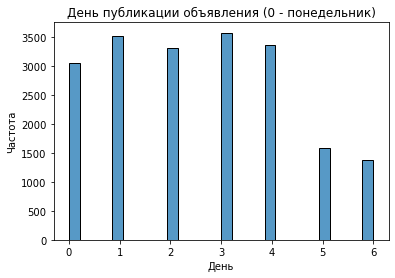

In [389]:
figure = sns.histplot(x=df['day_of_exposition'])

figure.set(xlabel = 'День', ylabel = 'Частота')
plt.title('День публикации объявления (0 - понедельник)')
plt.show()

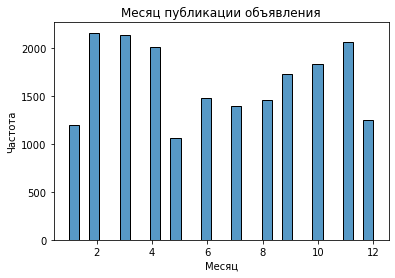

In [390]:
figure = sns.histplot(x=df['month_of_exposition'], bins=30)

figure.set(xlabel = 'Месяц', ylabel = 'Частота')
plt.title('Месяц публикации объявления')
plt.show()

**Вывод:** Чаще всего объявления публиковались по вторникам и четвергам. В выходные было опубликовано меньше всего объявлений. Больше всего было опубликовано объявлений о продаже квартиры в феврале. С февраля по июль наблюдается спад публикационной активности. Но с июля до ноября число объявлений росло. В декабре снова произошел спад в количестве публикаций.

### Скорость продажи квартир

Есть всплески на отметках 45 и 60 дней – многие квартиры продаются за 45 (чаще всего) или за 60 дней. Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил

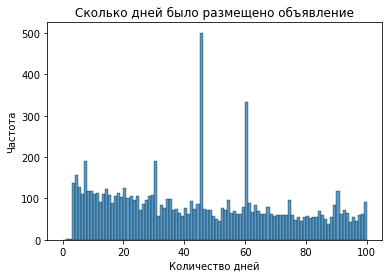

In [391]:
figure = sns.histplot(x=df['days_exposition'], binrange=(0,100), bins=100)

figure.set(xlabel = 'Количество дней', ylabel = 'Частота')
plt.title('Cколько дней было размещено объявление')
plt.show()

In [392]:
df['days_exposition'].describe()

count   17,120.00
mean       182.79
std        218.92
min          1.00
25%         44.00
50%        100.00
75%        235.00
max      1,580.00
Name: days_exposition, dtype: float64

In [393]:
print('Среднее значение переменной "days_exposition":', df['days_exposition'].describe()[1])
print('Медианное значение переменной "days_exposition":', df['days_exposition'].describe()[5])

Среднее значение переменной "days_exposition": 182.7868574766355
Медианное значение переменной "days_exposition": 100.0


Вывод: В среднем квартиры продаются за 183 дня (медиана – 99 дней). Необычно долгие продажи – те, что занимают более 237 дней. Квартиры, которые продаются быстрее чем за 44 дня, можно расценивать как быстрые продажи. Чаще всего квартиры продаются за 45 дней. Также часто собственникам удается продать квартиру за два месяца (60 дней).

### Факторы, влияющие на общую (полную) стоимость объекта

Изучим, как взаимосвязаны общая площадь, жилая площадь, площадь кухни с общей (полной) стоимостью объекта.

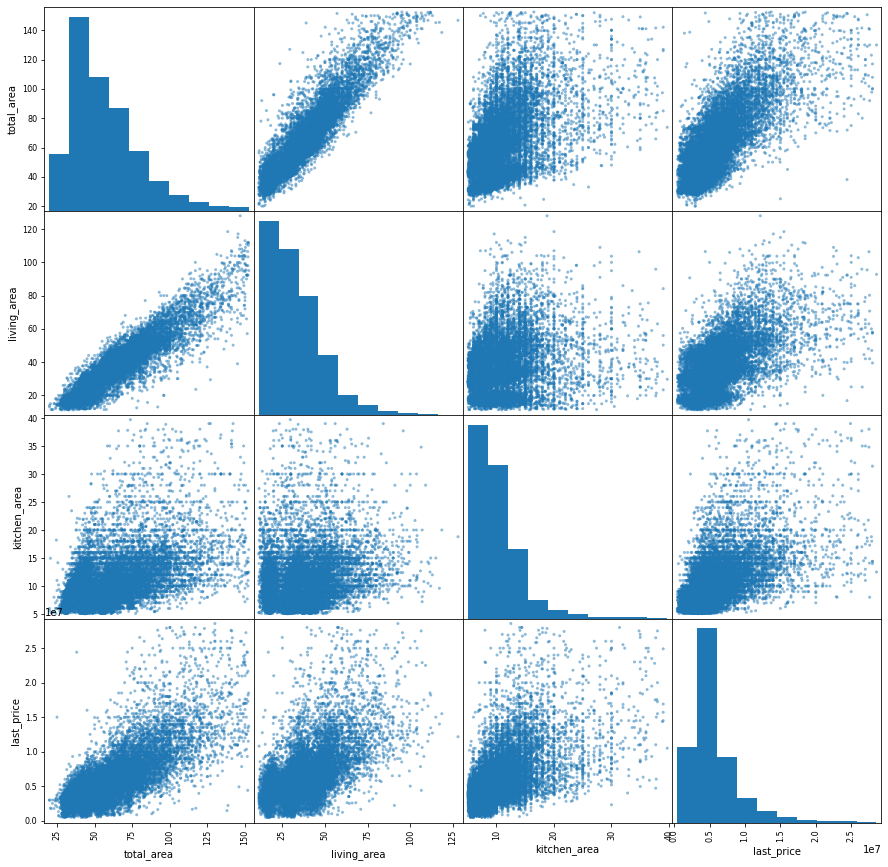

In [394]:
pd.plotting.scatter_matrix(df[['total_area', 'living_area', 'kitchen_area', 'last_price']], figsize=(15,15))
plt.show()

In [395]:
print('Коэффициент кореляции цена-общая площадь:', df['last_price'].corr(df['total_area']))

Коэффициент кореляции цена-общая площадь: 0.7589687258086115


In [396]:
print('Коэффициент кореляции цена-жилая площадь:', df['last_price'].corr(df['living_area']))

Коэффициент кореляции цена-жилая площадь: 0.6401529905493191


In [397]:
print('Коэффициент кореляции цена-площадь кухни:', df['last_price'].corr(df['kitchen_area']))

Коэффициент кореляции цена-площадь кухни: 0.5720163698754008


**Вывод:** На диаграмме рассеяния видно, что между общей площадью, жилой площадью, площадью кухни и ценой объекта положительная взаимосвязь. С ростом площади увеличивается цена объекта. Сила взаимосвязи различается. Между общей площадью и ценой взаимосвязь средняя, выражена сильнее, чем между ценой и остальными переменными: коэффициент корелляции 0.76. Между ценой и жилой площадью средняя корелляция (0.64), между ценой и площадью кухни корелляция еще слабее (0.57).

Рассмотрим, как взаимосвязаны количество комнат и тип этажа с общей (полной) стоимостью объекта.

In [398]:
print('Коэффициент кореляции цена-количество комнат:', df['last_price'].corr(df['rooms']))

Коэффициент кореляции цена-количество комнат: 0.47229900377202055


In [399]:
# функция, которая приводит строковые значения в целочисленные. для того, чтобы посчитать корелляцию

def floor_cat_num(series):
    if series == 'первый':
        return 0
    elif series == 'последний':
        return 2
    else:
        return 1

df['floor_cat_num'] = df['floor_cat'].apply(floor_cat_num)
display(df[['floor_cat', 'floor_cat_num']].head(10))

,floor_cat,floor_cat_num
0,другой,1
1,первый,0
2,другой,1
3,другой,1
4,другой,1
5,другой,1
6,другой,1
7,другой,1
8,последний,2
9,последний,2


In [400]:
print('Коэффициент кореляции цена-тип этажа:', df['last_price'].corr(df['floor_cat_num']))

Коэффициент кореляции цена-тип этажа: 0.04633941312884144


**Вывод:** Корелляция между ценой и типом этажа отсуствует (коэффициент корелляции меньше 0.5). Можно наблюдать среднюю корелляцию между ценой и количеством комнат (0.46). Характер корелляции положительный: с ростом числа комнат растет стоимость объекта.

Наконец, изучим, как связаны переменные день недели, месяц, год с общей (полной) стоимостью объекта

In [401]:
print('Коэффициент кореляции цена-день публикации объявления:', df['last_price'].corr(df['day_of_exposition']))

Коэффициент кореляции цена-день публикации объявления: -0.01793677577444699


In [402]:
print('Коэффициент кореляции цена-месяц публикации объявления:', df['last_price'].corr(df['month_of_exposition']))

Коэффициент кореляции цена-месяц публикации объявления: 0.0008467412841067553


In [403]:
print('Коэффициент кореляции цена-год публикации объявления:', df['last_price'].corr(df['year_of_exposition']))

Коэффициент кореляции цена-год публикации объявления: -0.021069901605532935


**Вывод:** Корелляция между днем недели, месяцем, годом и ценой отсуствует (коэффициент корелляции меньше 0.5 по модулю).

### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [404]:
lots_exposition = (df
                   .pivot_table(index='locality_name', values='one_metre_price', aggfunc=['median', 'count'])
)

lots_exposition.columns = ['median_one_metre_price', 'count']

lots_exposition = lots_exposition.sort_values(by='count', ascending=False).head(10)


display(lots_exposition.sort_values(by='median_one_metre_price', ascending=False))

,median_one_metre_price,count
locality_name,,
Санкт-Петербург,"103,409.09",13191
Пушкин,"100,200.45",294
посёлок Парголово,"92,142.86",281
деревня Кудрово,"91,499.17",224
посёлок Мурино,"84,375.00",393
Петергоф,"81,901.43",182
посёлок Шушары,"77,312.83",380
Колпино,"74,866.55",312
Гатчина,"68,604.65",263


In [405]:
print('Cредняя цена:', lots_exposition['median_one_metre_price'].mean())

Cредняя цена: 84010.14958773185


**Вывод:** Медианная цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений равна 84465.9. Населенные пункты с самой высокой стоимостью квадратного метра: Санкт-Петербург, Пушкин, Кудрово. Населенные пункты с самой низкой стоимостью квадратного метра: Всеволожск, Гатчина, Колпино.

### Средняя цена каждого км от центра (в Санкт-Петербурге)

In [406]:
spb_flats = df.query('locality_name == "Санкт-Петербург"')[['locality_name', 'cityCenters_nearest_km', 'last_price']]

display(spb_flats.head())

,locality_name,cityCenters_nearest_km,last_price
0,Санкт-Петербург,16.00,13000000
2,Санкт-Петербург,14.00,5196000
5,Санкт-Петербург,15.00,5400000
6,Санкт-Петербург,14.00,5050000
11,Санкт-Петербург,14.00,4650000


In [407]:
spb_flats['one_km_price'] = spb_flats['last_price']/spb_flats['cityCenters_nearest_km']

display(spb_flats.head())

,locality_name,cityCenters_nearest_km,last_price,one_km_price
0,Санкт-Петербург,16.00,13000000,"812,500.00"
2,Санкт-Петербург,14.00,5196000,"371,142.86"
5,Санкт-Петербург,15.00,5400000,"360,000.00"
6,Санкт-Петербург,14.00,5050000,"360,714.29"
11,Санкт-Петербург,14.00,4650000,"332,142.86"


In [408]:
print('Средняя цена каждого км:', np.mean(spb_flats['one_km_price'][np.isfinite(spb_flats['one_km_price'])]))

Средняя цена каждого км: 922137.0492703936


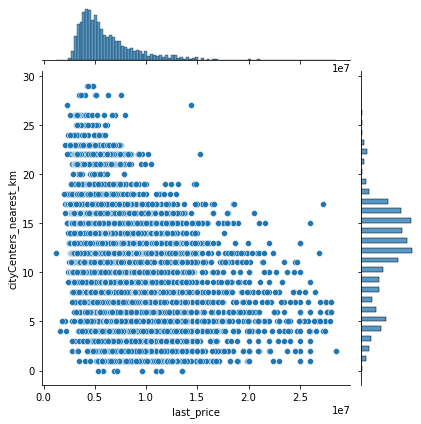

In [409]:
sns.jointplot(x='last_price', y='cityCenters_nearest_km', 
              data=spb_flats, kind='scatter')
plt.show()

In [410]:
print('Коэффициент корелляции между стоимостью-расстоянием до центра города',spb_flats['last_price'].corr(spb_flats['cityCenters_nearest_km']))

Коэффициент корелляции между стоимостью-расстоянием до центра города -0.41239876462895897


**Вывод**: Средняя цена каждого км – 92,2 тыс. Переменная `cityCenters_nearest_km` слабо скореллирована с переменной `last_price` (коэффициент корелляции 0.4), характер взаимосвязи – отрицательный. С увеличением расстояния от центра падает цена квартиры. 

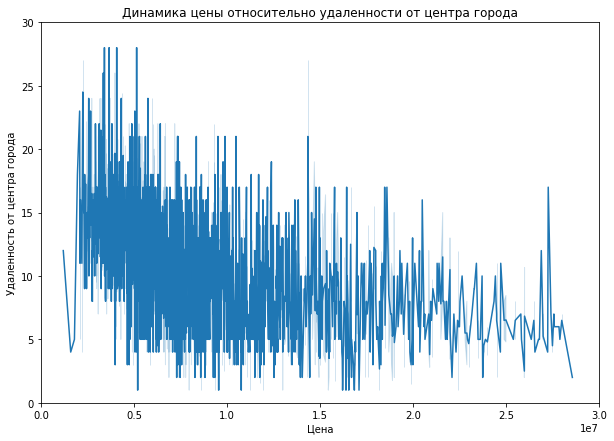

In [411]:
plt.figure(figsize=(10, 7))
plt.xlim(0,30000000)
plt.ylim(0,30)
sns.lineplot(x='last_price', y='cityCenters_nearest_km', data=spb_flats)
plt.xlabel('Цена')
plt.ylabel('Удаленность от центра города')
plt.title('Динамика цены относительно удаленности от центра города');

### Общий вывод

Неявные дубликаты были удалены в результате изучения уникальных значений переменной `locality_name`. Повторы выявлялись вручную, а затем заменялись в срезе неверных значений. В массиве не было обнаружено явных дубликатов. 

Далее были заполнены или удалены пропущенные значения в переменных. Мы изучили распределение переменных `living_area`, `kitchen_area`, `floors_total`, `ceiling_height`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и  `days_exposition` и выявили выбросы. Мы избавились от большинства выбросов в данных и при этом постарались не повлиять на изначальное распределение данных и сохранить размер выборки. После того, как выбросы были удалены, мы заполнили пропущенные значения практически во всех переменных, где они были. Для заполнения пропусков чаще всего использовалась медиана. Подходы, основанные на логике мы использовали при замене переменных `balcony`, `is_apartment` и `ceiling_height`. Мы оставили пропуски в тех переменных, где не получилось их восстановить на основе имеющихся данных. При этом удалить эти наблюдения из выборки мы не можем: переменные, указывающие на дистанцию до точки (`airports_nearest` и проч.), связаны с определенными типами местностями (деревни, сёла и т.д.). Их удаление приведет к исключению ряда категорий типов местности из выборки, а также значительному сокращению наблюдений. Мы также не заменяли и не удаляли пропуски в том случае, если замена может исказить изначальное распределение (переменные `parks_nearest` и `ponds_nearest`). Пропуски в переменной `days_exposition` – скорее технические, связанные с человеческим фактором. Мы не можем удалить их, поскольку наблюдений много. Но также не представляется возможным заменить их на основе логики. Поэтому было принятно решение оставить их.

Был изменен тип данных у переменных `floors_total`, `balcony`, `is_apartment`, `studio`, `open_plan` и `first_day_exposition`.

Далее было изучено распределение ключевых переменных. Мы постарались максимально удалить выбросы из выборки, при этом сохранив её изначальное распределение. В результате мы получили 18203 наблюдений с оставленными/замененными пропусками.

Далее мы реализовали исследовательский анализ данных. Распределение большинства переменных смещено влево. Многие переменные в массиве данных скорелированны. В заключение мы более внимательно изучили скорость продажи квартир. В среднем квартиры продаются за 183 дня (медиана – 99 дней). Необычно долгие продажи – те, что занимают более 237 дней. Квартиры, которые продаются быстрее чем за 44 дня, можно расценивать как быстрые продажи. Чаще всего квартиры продаются за 45 дней. Также часто собственникам удается продать квартиру за два месяца (60 дней).

Мы также рассмотрели факторы, которые влияют на стоимость квартир. Между общей площадю, жилой площадю, площадью кухни и ценой объекта положительная взаимосвязь. С ростом площади увеличивается цена объекта. Сила взаимосвязи различается. Между общей площадью и ценой взаимосвязь средняя, выражена сильнее, чем между ценой и остальными переменными: коэффициент корелляции 0.75. Между ценой и жилой площадью средняя корелляция (0.63), между ценой и площадью кухни корелляция еще слабее (0.56). Корелляция между ценой и типом этажа отсуствует (коэффициент корелляции меньше 0.5). Можно наблюдать среднюю корелляцию между ценой и количеством комнат (0.46). Характер корелляции положительный: с ростом числа комнат растет стоимость объекта. Корелляция между днем недели, месяцем, годом и ценой отсуствует (коэффициент корелляции меньше 0.5 по модулю).

По результатам анализа мы выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра. Медианная цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений равна 84465.9. Населенные пункты с самой высокой стоимостью квадратного метра: Санкт-Петербург, Пушкин, Кудрово. Населенные пункты с самой низкой стоимостью квадратного метра: Всеволожск, Гатчина, Колпино.

Наконец, мы вычислили среднюю цену каждого километра от центра в Санкт-Петербурге. Средняя цена каждого км – 88,6 тыс. Переменная `cityCenters_nearest` слабо скореллирована с переменной `last_price` (коэффициент корелляции 0.4), характер взаимосвязи – отрицательный. С увеличением расстояния от центра падает цена квартиры. Для наглядности данные были визуализированы.